## 📌 사용 라이브러리

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [4]:
# 한글폰트 사용을 위한 코드
from matplotlib import rc, font_manager
%matplotlib inline

# 한글폰트 사용을 위한 코드
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [5]:
df = pd.read_excel("./commerce.xlsx", encoding="cp949")

In [6]:
df_shipping = df.copy()

## 📌 테이블 정의서
#### 기본 정보
* 테이블명 : 일자별 행정동별 카테고리별 물류 건수
* 테이블 개요 : [적재주기:일단위] 기준지역 내 일자별 카테고리별 물류 건수

#### 특기사항
* 기간 : 19년 2월 1일 - 19년 5월 31일, 20년 2월 1일~20년 5월 31일
* 지역 : 대구(수성구, 중구), 서울(노원구, 중구) 내 전 행정동
* 카테고리별(대분류기준) 송장 건수


## 데이터 전처리 _ 날짜변경

In [7]:
df_shipping.rename(columns={"DL_YMD":"배송년월일"}, inplace=True)
df_shipping.rename(columns={"DL_GD_LCLS_NM":"배송상품대분류명"}, inplace=True)
df_shipping.rename(columns={"DL_GD_LCLS_CD":"배송상품대분류코드"}, inplace=True)
df_shipping.rename(columns={"CTPV_NM":"시도명"}, inplace=True)
df_shipping.rename(columns={"CTPV_CD":"시도코드"}, inplace=True)
df_shipping.rename(columns={"CTGG_NM":"시군구명"}, inplace=True)
df_shipping.rename(columns={"CTGG_CD":"시군구코드"}, inplace=True)
df_shipping.rename(columns={"HDNG_NM":"행정동명"}, inplace=True)
df_shipping.rename(columns={"HDNG_CD":"행정동코드"}, inplace=True)
df_shipping.rename(columns={"INVC_CONT":"송장건수"}, inplace=True)

In [8]:
df_shipping.head()

,배송년월일,배송상품대분류명,배송상품대분류코드,시도명,시도코드,시군구명,시군구코드,행정동명,행정동코드,송장건수
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21


In [9]:
df_shipping['배송날짜'] = df_shipping['배송년월일'] +20000000

In [10]:
df_shipping.head()

,배송년월일,배송상품대분류명,배송상품대분류코드,시도명,시도코드,시군구명,시군구코드,행정동명,행정동코드,송장건수,배송날짜
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16,20190201
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4,20190201
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1,20190201
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6,20190201
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21,20190201


In [11]:
df_shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156571 entries, 0 to 156570
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   배송년월일      156571 non-null  int64 
 1   배송상품대분류명   156571 non-null  object
 2   배송상품대분류코드  156571 non-null  int64 
 3   시도명        156571 non-null  object
 4   시도코드       156571 non-null  int64 
 5   시군구명       156571 non-null  object
 6   시군구코드      156571 non-null  int64 
 7   행정동명       156571 non-null  object
 8   행정동코드      156571 non-null  int64 
 9   송장건수       156571 non-null  int64 
 10  배송날짜       156571 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 13.1+ MB


In [12]:
df_shipping['배송날짜'] = pd.to_datetime(df_shipping['배송날짜'], format='%Y%m%d')

In [13]:
df_shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156571 entries, 0 to 156570
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   배송년월일      156571 non-null  int64         
 1   배송상품대분류명   156571 non-null  object        
 2   배송상품대분류코드  156571 non-null  int64         
 3   시도명        156571 non-null  object        
 4   시도코드       156571 non-null  int64         
 5   시군구명       156571 non-null  object        
 6   시군구코드      156571 non-null  int64         
 7   행정동명       156571 non-null  object        
 8   행정동코드      156571 non-null  int64         
 9   송장건수       156571 non-null  int64         
 10  배송날짜       156571 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 13.1+ MB


In [14]:
df_shipping.head()

,배송년월일,배송상품대분류명,배송상품대분류코드,시도명,시도코드,시군구명,시군구코드,행정동명,행정동코드,송장건수,배송날짜
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16,2019-02-01
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4,2019-02-01
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1,2019-02-01
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6,2019-02-01
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21,2019-02-01


In [15]:
df_shipping['배송연도']=pd.DatetimeIndex(df_shipping['배송날짜']).year

In [16]:
shipping_2019=df_shipping[df_shipping.배송날짜<'2020']

In [17]:
shipping_2019['배송날짜']=shipping_2019['배송날짜'].apply(lambda x: x.strftime('%m-%d'))

In [18]:
shipping_2020=df_shipping[df_shipping.배송날짜>'2019']

In [19]:
shipping_2020['배송날짜']=shipping_2020['배송날짜'].apply(lambda x: x.strftime('%m-%d'))

In [20]:
p = shipping_2020[shipping_2020.배송연도==2019]

In [21]:
shipping_2020 = shipping_2020.loc[76892:]

In [22]:
shipping_2020

,배송년월일,배송상품대분류명,배송상품대분류코드,시도명,시도코드,시군구명,시군구코드,행정동명,행정동코드,송장건수,배송날짜,배송연도
76892,200201,가구/인테리어,10,대구광역시,27,수성구,26,범어3동,530,3,02-01,2020
76893,200201,도서/음반,12,서울특별시,11,노원구,35,월계1동,560,24,02-01,2020
76894,200201,가구/인테리어,10,대구광역시,27,수성구,26,범물2동,662,3,02-01,2020
76895,200201,가구/인테리어,10,서울특별시,11,노원구,35,상계3.4동,665,4,02-01,2020
76896,200201,도서/음반,12,대구광역시,27,수성구,26,수성1가동,570,34,02-01,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
156566,200531,패션의류,19,대구광역시,27,수성구,26,범물2동,662,22,05-31,2020
156567,200531,패션의류,19,서울특별시,11,중구,14,약수동,635,21,05-31,2020
156568,200531,패션잡화,20,대구광역시,27,수성구,26,범물2동,662,14,05-31,2020
156569,200531,패션잡화,20,서울특별시,11,노원구,35,상계6.7동,695,25,05-31,2020


In [186]:
df_shipping['배송상품대분류명'].unique()

array(['도서/음반', '가구/인테리어', '디지털/가전', '스포츠/레저', '패션잡화', '식품', '생활건강',
       '패션의류', '화장품/미용', '출산/육아'], dtype=object)

# 2월~5월 전국 송장건수 전년대비 비교 
## ✔️전년도 대비 전체 송장건수 증가
* 2020년 5월에 아웃라이어 
-> 정부는 3월 22일부터 4월 19일까지를 '고강도 거리두기', 4월 20일부터 5월 5일까지를 '완화된 거리두기' 실천기간으로 정해 사회적 이동을 줄이는 조치를 해왔다.
-> 사회적 거리두기 황금연휴 기간인 5월 5일까지는 사회적 거리두기 반드시 지킬것을 요청했다.
-> 중앙재난안전대책본부는 5월 6일부터 시작하는 생활 속 거리 두기 안전수칙을 발표했다. (생활 속 거리 두기 기간에는 원칙적으로 모든 시설의 운영이 가능하지만, 시설별 위험도를 고려해 입장 인원을 제한하는 등 위험도를 가능한 낮출 수 있는 방역 조치를 마련하면서 점진적으로 운영을 재개할 예정.) 

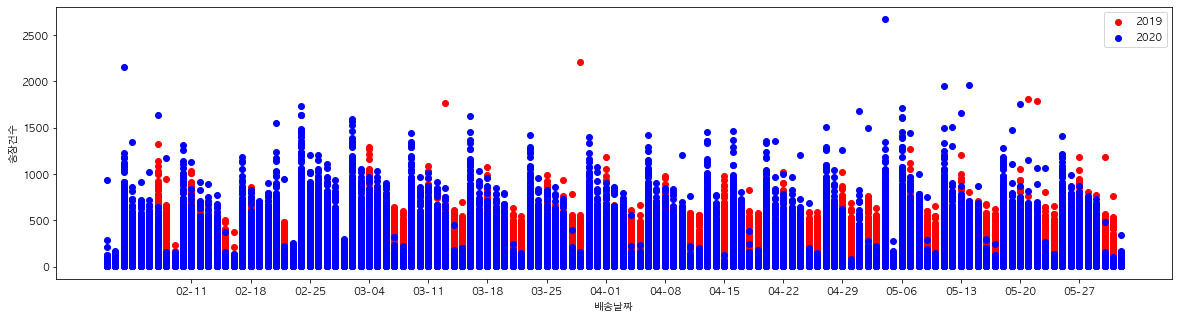

In [87]:
fig, ax = plt.subplots(figsize=(20,5))
ax.scatter(shipping_2019["배송날짜"], shipping_2019["송장건수"],
color="red", label="2019") 

ax.scatter(shipping_2020["배송날짜"], shipping_2020["송장건수"],
color="blue", label="2020") 

ax.legend()
ax.set_xlabel("배송날짜") 
ax.set_ylabel("송장건수")
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
plt.show()
      

In [94]:
line_shipping_2019 = shipping_2019.groupby(['배송날짜'])[['송장건수']].sum()
line_shipping_2020 = shipping_2020.groupby(['배송날짜'])[['송장건수']].sum()

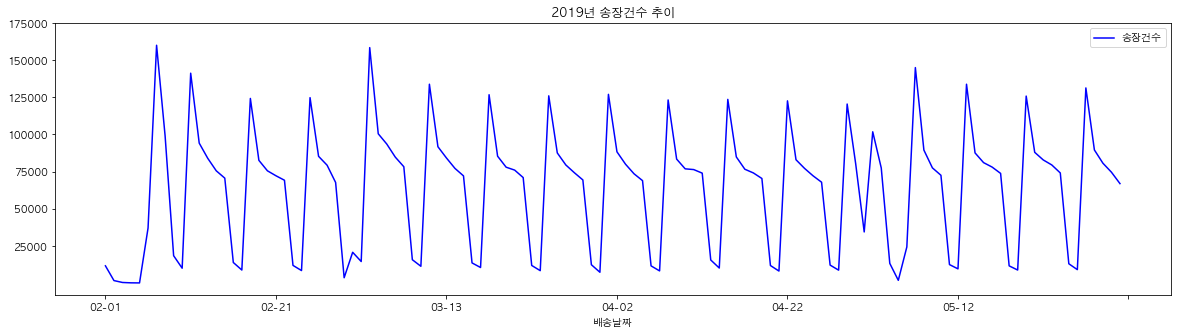

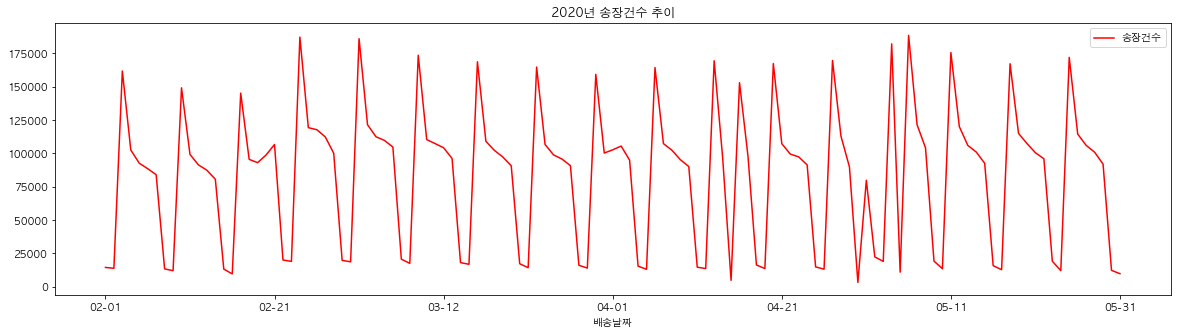

In [149]:
line_shipping_2019.plot(figsize=(20,5), color='blue')
plt.title('2019년 송장건수 추이')
plt.yticks([25000, 50000, 75000, 100000, 125000, 150000, 175000])

line_shipping_2020.plot(figsize=(20,5), color='red')
plt.title('2020년 송장건수 추이')
plt.show()

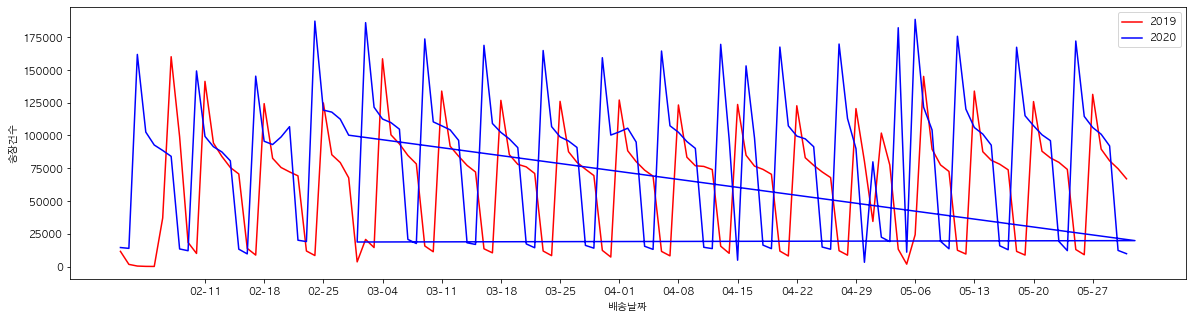

In [150]:
fig, ax = plt.subplots(figsize=(20,5))

sns.lineplot(line_shipping_2019.index,line_shipping_2019["송장건수"],color="red", label="2019") 
sns.lineplot(line_shipping_2020.index, line_shipping_2020["송장건수"],color="blue", label="2020") 

ax.legend()
ax.set_xlabel("배송날짜") 
ax.set_ylabel("송장건수")
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
plt.show()

## ✔️2019년 전국 상위 송장건수 업종:
==> 1위. 패션의류, 2위: 식품, 3위: 생활건강

## ✔️2020년 전국 상위 송장건수 업종:
==> 1위. 식품, 2위: 생활건강, 3위:패션의류


* 추가 정보
`생활건강`: 생활용품, 생활잡화, 건강관리용품, 온열/찜질 용품, 애완 등 (카테고리 내 상품군을 보면, '실내'에서 사용하는 용품임을 파악할 수 있다.)

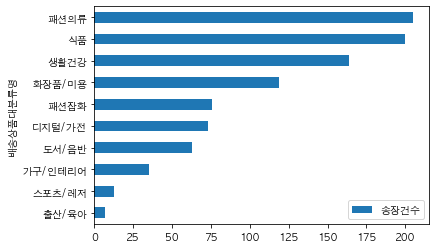

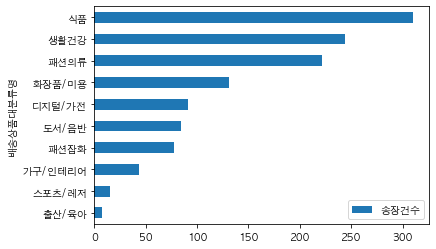

In [184]:
#2019년 전국 상위 송장건수 업종
t1 = shipping_2019.groupby(['배송상품대분류명'])[['송장건수']].mean().round().sort_values(by='송장건수')
t1.plot(kind="barh")
#2020년 전국 상위 송장건수 업종
t2 = shipping_2020.groupby(['배송상품대분류명'])[['송장건수']].mean().round().sort_values(by='송장건수')
t2.plot(kind="barh")


<Figure size 1440x216 with 0 Axes>

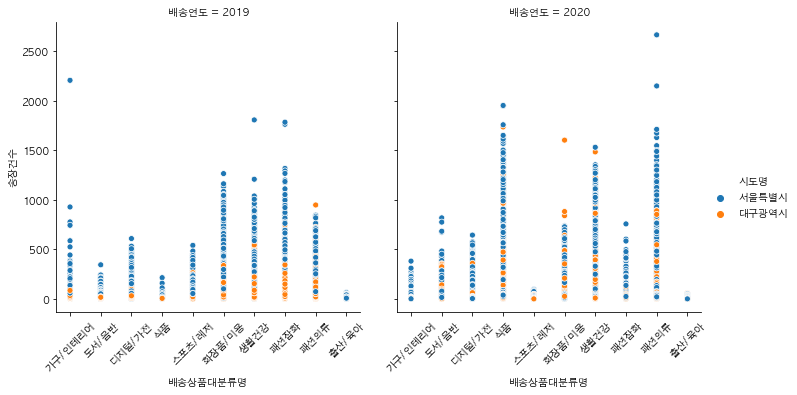

In [25]:
plt.figure(figsize=(20,3))
chart= sns.relplot(data=df_shipping, x="배송상품대분류명", y="송장건수", hue="시도명", kind='scatter', col='배송연도')
chart.set_xticklabels(rotation=45)

In [152]:
df_shipping['배송연도'].value_counts()

2020    79679
2019    76892
Name: 배송연도, dtype: int64

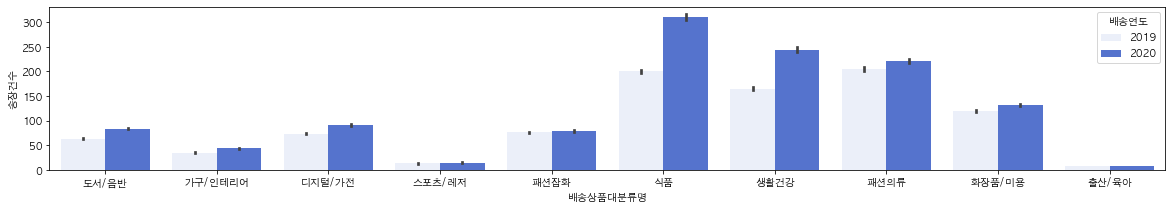

In [153]:
plt.figure(figsize=(20,3))
chart= sns.barplot(data=df_shipping, x="배송상품대분류명", y="송장건수", hue="배송연도", color='royalblue')
plt.show()

In [155]:
df_shipping

,배송년월일,배송상품대분류명,배송상품대분류코드,시도명,시도코드,시군구명,시군구코드,행정동명,행정동코드,송장건수,배송날짜,배송연도
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16,2019-02-01,2019
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4,2019-02-01,2019
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1,2019-02-01,2019
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6,2019-02-01,2019
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21,2019-02-01,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
156566,200531,패션의류,19,대구광역시,27,수성구,26,범물2동,662,22,2020-05-31,2020
156567,200531,패션의류,19,서울특별시,11,중구,14,약수동,635,21,2020-05-31,2020
156568,200531,패션잡화,20,대구광역시,27,수성구,26,범물2동,662,14,2020-05-31,2020
156569,200531,패션잡화,20,서울특별시,11,노원구,35,상계6.7동,695,25,2020-05-31,2020


In [175]:
df_shipping.groupby(['배송상품대분류명'])[['송장건수']].mean().round().sort_values(by='송장건수', ascending=False)

,송장건수
배송상품대분류명,
식품,255.0
패션의류,213.0
생활건강,205.0
화장품/미용,125.0
디지털/가전,82.0
패션잡화,77.0
도서/음반,73.0
가구/인테리어,40.0
스포츠/레저,14.0


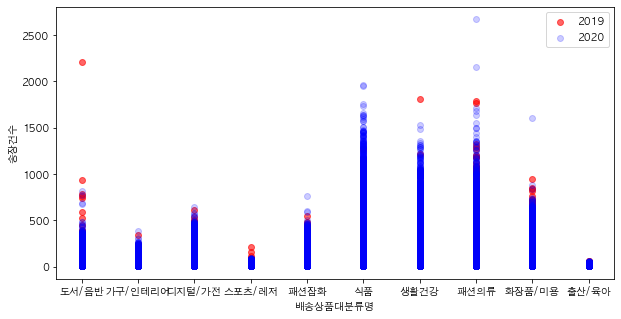

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(shipping_2019["배송상품대분류명"], shipping_2019["송장건수"],
color="red",alpha=0.6, label="2019") 
ax.scatter(shipping_2020["배송상품대분류명"], shipping_2020["송장건수"],
color="blue", alpha=0.2, label="2020") 

ax.legend()
ax.set_xlabel("배송상품대분류명") 
ax.set_ylabel("송장건수")

plt.show()
      

## 업종별 시계열 상 빈도 차이 

In [29]:
shipping_2019['배송상품대분류코드'].unique()

array([12, 10, 13, 16, 20, 17, 15, 19, 21, 18])

In [30]:
#업종별 코드번호 확인
column_values = shipping_2019[['배송상품대분류코드', '배송상품대분류명']].values.ravel()
unique_values = pd.unique(column_values)
print(unique_values)

[12 '도서/음반' 10 '가구/인테리어' 13 '디지털/가전' 16 '스포츠/레저' 20 '패션잡화' 17 '식품' 15
 '생활건강' 19 '패션의류' 21 '화장품/미용' 18 '출산/육아']


In [31]:
#함수 시도 
x = [12, 10, 13, 16, 20, 17, 15, 19, 21, 18]
def test(x):
    return shipping_2019[shipping_2019['배송상품대분류코드'] == x].groupby("배송날짜")[['송장건수']]

for elem in x:
    print(test(elem))

### 스포츠/레저 송장건수 

In [32]:
sports_2019 = shipping_2019[shipping_2019['배송상품대분류코드'] == 16]
sports_2020 = shipping_2020[shipping_2020['배송상품대분류코드'] == 16]

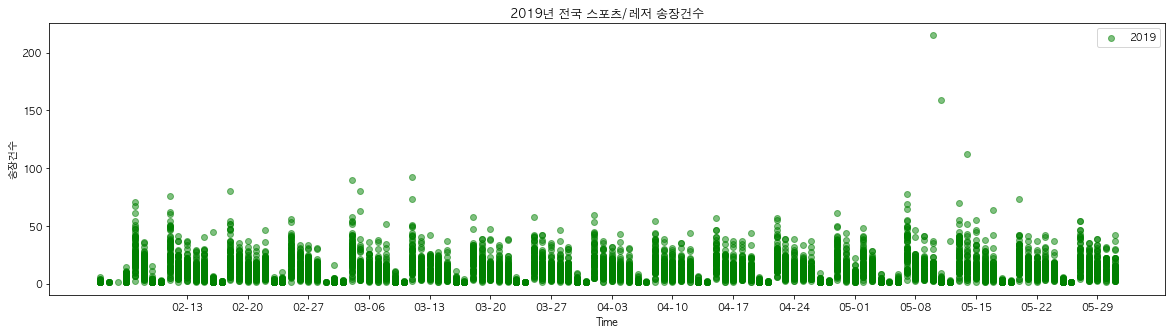

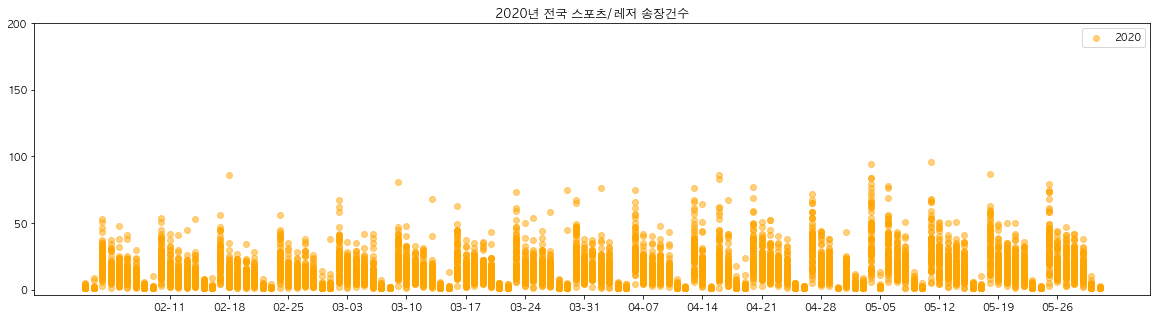

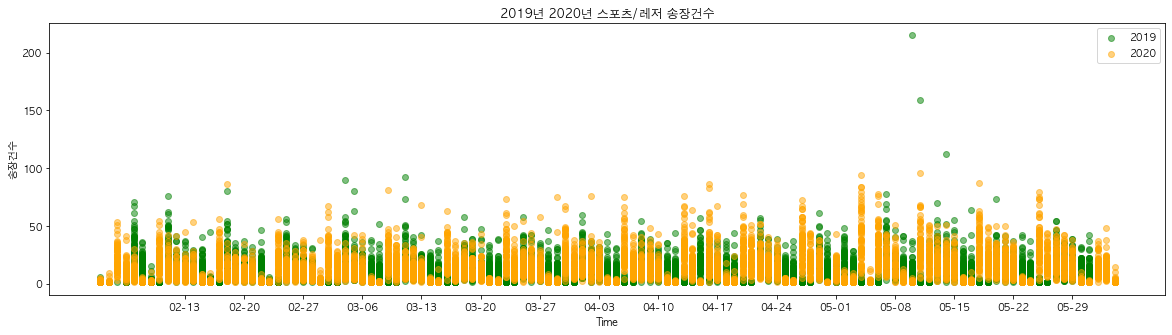

In [33]:
#2019년 송장건수 scatterplot
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(sports_2019['배송날짜'],sports_2019['송장건수'], color='green', label="2019",alpha=0.5) 
ax.set_xlabel('Time') 
ax.set_ylabel('송장건수')
ax.set_title('2019년 전국 스포츠/레저 송장건수')
ax.legend()
plt.xticks(np.arange(min(x), max(x)+100, 7.0))


#2020년 송장건수 scatterplot
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(sports_2020['배송날짜'], sports_2020['송장건수'],
color='orange', label='2020',alpha=0.5)
ax.set_title('2020년 전국 스포츠/레저 송장건수')
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
plt.yticks([0, 50, 100, 150, 200])
ax.legend()

#2019년 2020년 한 눈에 보기
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(sports_2019['배송날짜'], sports_2019['송장건수'], color='green', label="2019",alpha=0.5,) 
ax.set_xlabel('Time') 
ax.set_ylabel('송장건수')
ax.set_title('2019년 2020년 스포츠/레저 송장건수')
plt.xticks(np.arange(min(x), max(x)+100, 7.0))


ax.scatter(sports_2020['배송날짜'], sports_2020['송장건수'],
color='orange', label='2020',alpha=0.5)
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
ax.legend()

plt.show()

In [34]:
#2019년 2020년 한 눈에 보기
# fig, ax = plt.subplots(figsize=(20,5)) 
# ax.plot(sports_2019['배송날짜'], sports_2019['송장건수'], color='green', label="2019",alpha=0.5,) 
# ax.set_xlabel('Time') 
# ax.set_ylabel('송장건수')
# ax.set_title('2019년 2020년 스포츠/레저 송장건수')
# plt.xticks(np.arange(min(x), max(x)+100, 7.0))
# plt.yticks([0, 50, 100, 150, 200])


# ax.plot(sports_2020['배송날짜'], sports_2020['송장건수'],
# color='orange', label='2020',alpha=0.5)
# plt.xticks(np.arange(min(x), max(x)+100, 7.0))
# plt.yticks([0, 50, 100, 150, 200])
# ax.legend()

# plt.show()

### 생활건강 송장건수

In [35]:
health_2019 = shipping_2019[shipping_2019['배송상품대분류코드'] == 15]
health_2020 = shipping_2020[shipping_2020['배송상품대분류코드'] == 15]

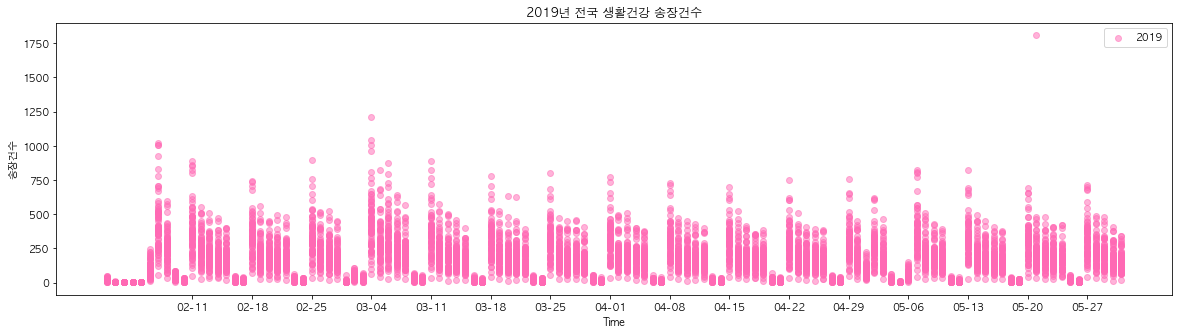

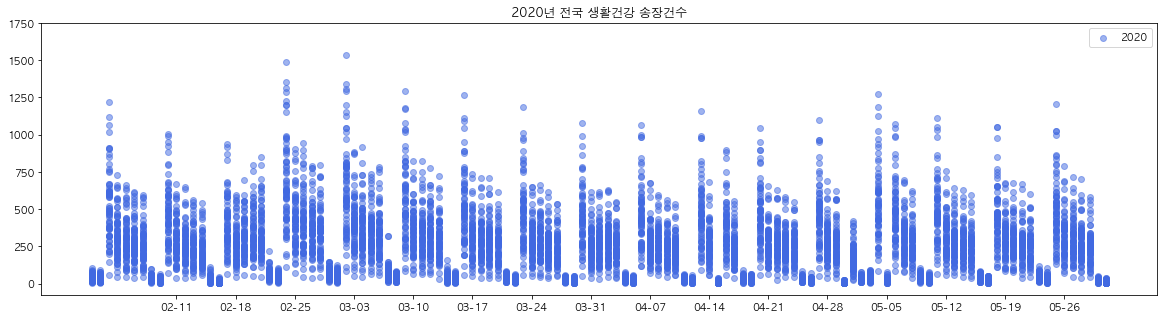

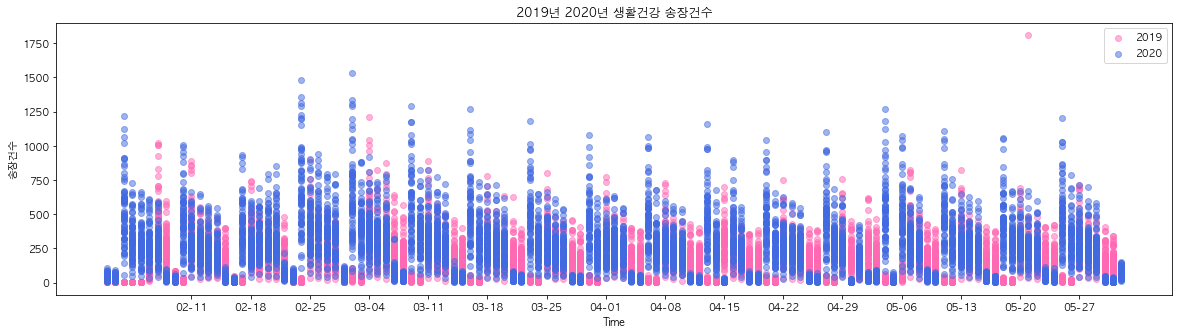

In [36]:
#2019년 송장건수 scatterplot
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(health_2019['배송날짜'],health_2019['송장건수'], color='hotpink', label="2019",alpha=0.5) 
ax.set_xlabel('Time') 
ax.set_ylabel('송장건수')
ax.set_title('2019년 전국 생활건강 송장건수')
ax.legend()
plt.xticks(np.arange(min(x), max(x)+100, 7.0))

#2020년 송장건수 scatterplot
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(health_2020['배송날짜'], health_2020['송장건수'],
color='royalblue', label='2020',alpha=0.5)
ax.set_title('2020년 전국 생활건강 송장건수')
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
plt.yticks([0, 250, 500, 750, 1000, 1250, 1500,1750])
ax.legend()

#2019년 2020년 한 눈에 보기
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(health_2019['배송날짜'], health_2019['송장건수'], color='hotpink', label="2019",alpha=0.5,) 
ax.set_xlabel('Time') 
ax.set_ylabel('송장건수')
ax.set_title('2019년 2020년 생활건강 송장건수')
plt.xticks(np.arange(min(x), max(x)+100, 7.0))

ax.scatter(health_2020['배송날짜'], health_2020['송장건수'],
color='royalblue', label='2020',alpha=0.5)
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
ax.legend()
plt.yticks([0, 250, 500, 750, 1000, 1250, 1500,1750])
plt.show()

In [37]:
# #2019년 2020년 한 눈에 보기
# fig, ax = plt.subplots(figsize=(20,5)) 
# ax.plot(health_2019['배송날짜'], health_2019['송장건수'], color='hotpink', label="2019",alpha=0.5,) 
# ax.set_xlabel('Time') 
# ax.set_ylabel('송장건수')
# ax.set_title('2019년 2020년 생활건강 송장건수')
# plt.xticks(np.arange(min(x), max(x)+100, 7.0))

# ax2 = ax.twinx()
# ax.plot(health_2020['배송날짜'], health_2020['송장건수'],
# color='royalblue', label='2020',alpha=0.5)
# plt.xticks(np.arange(min(x), max(x)+100, 7.0))
# ax.legend()
# plt.yticks([0, 250, 500, 750, 1000, 1250, 1500,1750])
# plt.show()

### 식품 송장건수

In [38]:
food_2019 = shipping_2019[shipping_2019['배송상품대분류코드'] == 17]
food_2020 = shipping_2020[shipping_2020['배송상품대분류코드'] == 17]

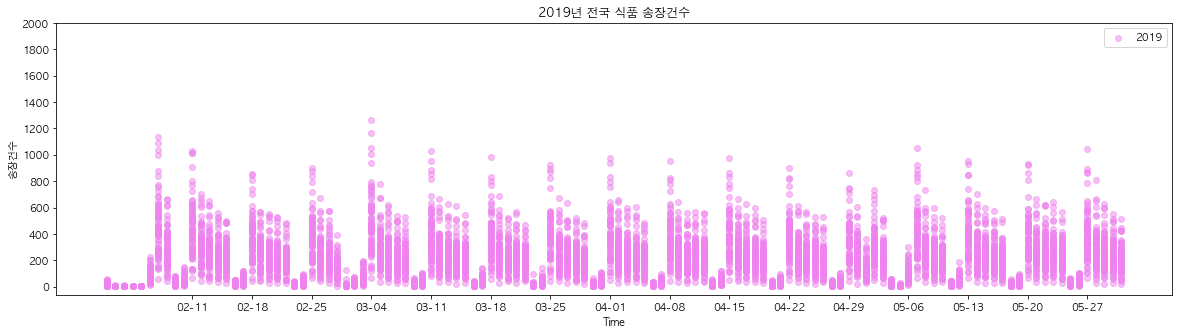

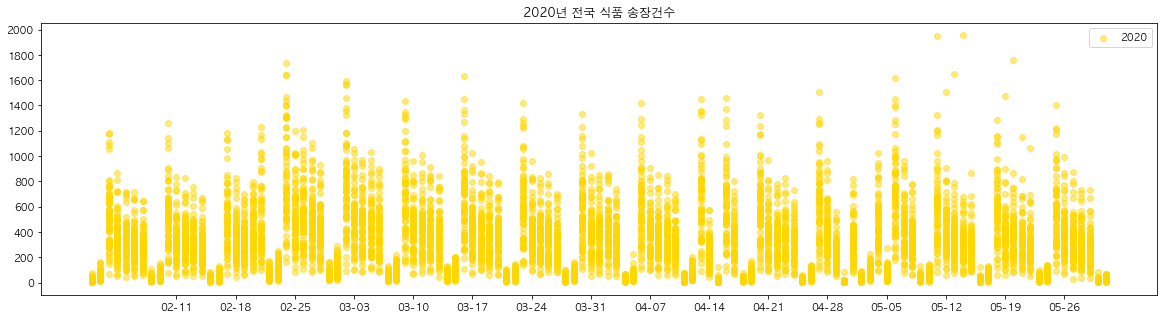

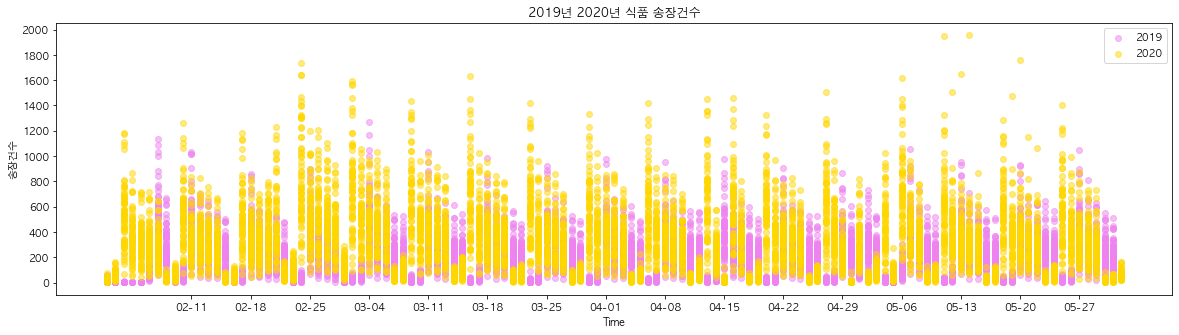

In [39]:
#2019년 송장건수 scatterplot
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(food_2019['배송날짜'],food_2019['송장건수'], color='violet', label="2019",alpha=0.5) 
ax.set_xlabel('Time') 
ax.set_ylabel('송장건수')
ax.set_title('2019년 전국 식품 송장건수')
ax.legend()
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
plt.yticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000])

#2020년 송장건수 scatterplot
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(food_2020['배송날짜'], food_2020['송장건수'],
color='gold', label='2020',alpha=0.5)
ax.set_title('2020년 전국 식품 송장건수')
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
plt.yticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000])
ax.legend()

#2019년 2020년 한 눈에 보기
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(food_2019['배송날짜'], food_2019['송장건수'], color='violet', label="2019",alpha=0.5,) 
ax.set_xlabel('Time') 
ax.set_ylabel('송장건수')
ax.set_title('2019년 2020년 식품 송장건수')
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
plt.yticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000])


ax.scatter(food_2020['배송날짜'], food_2020['송장건수'],
color='gold', label='2020',alpha=0.5)
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
ax.legend()

plt.show()

In [40]:
# #2019년 2020년 한 눈에 보기
# fig, ax = plt.subplots(figsize=(20,5)) 
# ax.plot(food_2019['배송날짜'], food_2019['송장건수'], color='violet', label="2019",alpha=0.5,) 
# ax.set_xlabel('Time') 
# ax.set_ylabel('송장건수')
# ax.set_title('2019년 2020년 식품 송장건수')
# plt.xticks(np.arange(min(x), max(x)+100, 7.0))
# plt.yticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000])

# ax2 = ax.twinx()
# ax2.plot(food_2020['배송날짜'], food_2020['송장건수'],
# color='gold', label='2020',alpha=0.5)
# plt.xticks(np.arange(min(x), max(x)+100, 7.0))
# ax2.legend()
# plt.yticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000])

# plt.show()

### 도서/음반 송장건수 

In [41]:
culture_2019 = shipping_2019[shipping_2019['배송상품대분류코드'] == 12]

In [42]:
culture_2020 = shipping_2020[shipping_2020['배송상품대분류코드'] == 12]

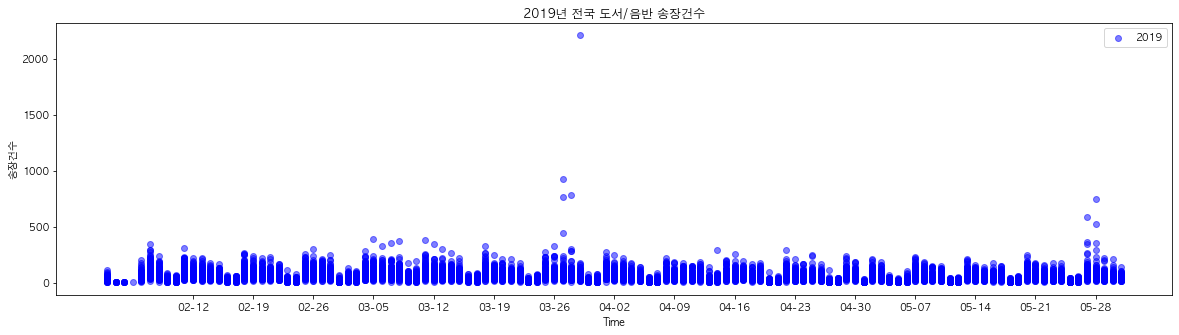

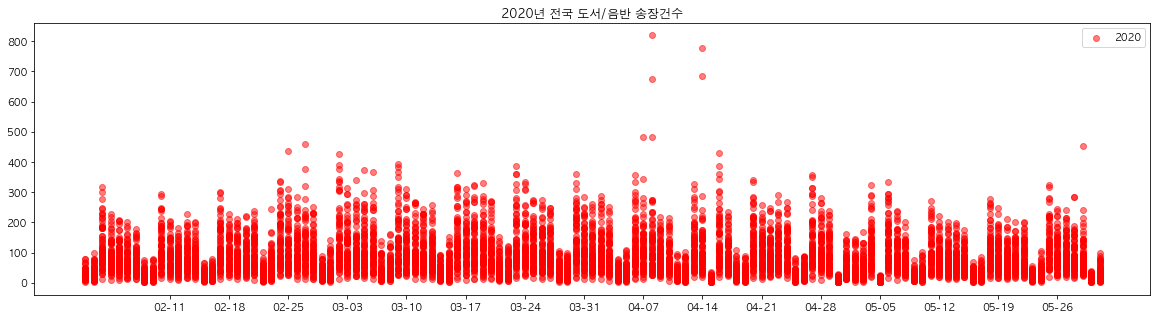

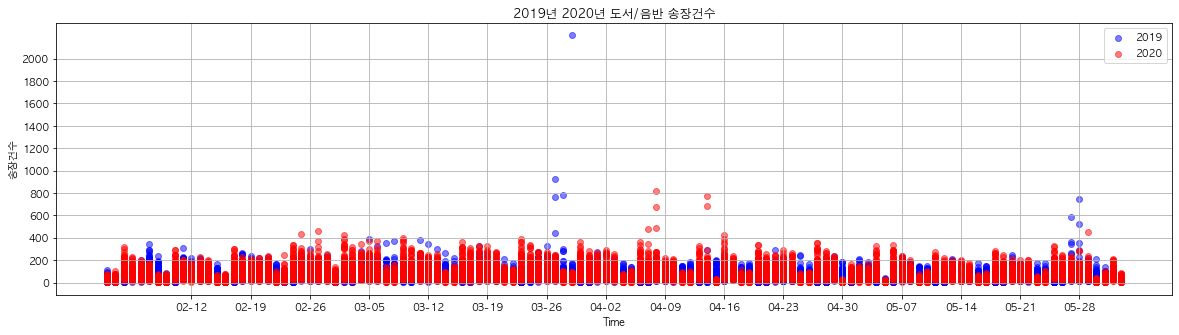

In [43]:
#2019년 도서/음반 송장건수 scatterplot
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(culture_2019['배송날짜'], culture_2019['송장건수'], color='blue', label="2019",alpha=0.5,) 
ax.set_xlabel('Time') 
ax.set_ylabel('송장건수')
ax.set_title('2019년 전국 도서/음반 송장건수')
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
ax.legend()

#2020년 도서/음반 송장건수 scatterplot
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(culture_2020['배송날짜'], culture_2020['송장건수'],
color='red', label='2020',alpha=0.5)
ax.set_title('2020년 전국 도서/음반 송장건수')
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
ax.legend()

#2019년 2020년 한 눈에 보기
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(culture_2019['배송날짜'], culture_2019['송장건수'], color='blue', label="2019",alpha=0.5,) 
ax.set_xlabel('Time') 
ax.set_ylabel('송장건수')
ax.set_title('2019년 2020년 도서/음반 송장건수')
plt.xticks(np.arange(min(x), max(x)+100, 7.0))


ax.scatter(culture_2020['배송날짜'], culture_2020['송장건수'],
color='red', label='2020',alpha=0.5)
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
ax.legend()
plt.yticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000])
plt.grid(b=None)
plt.show()

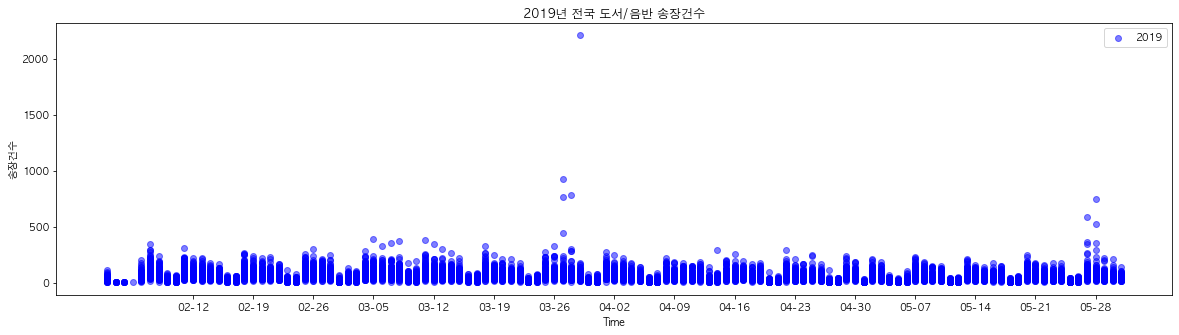

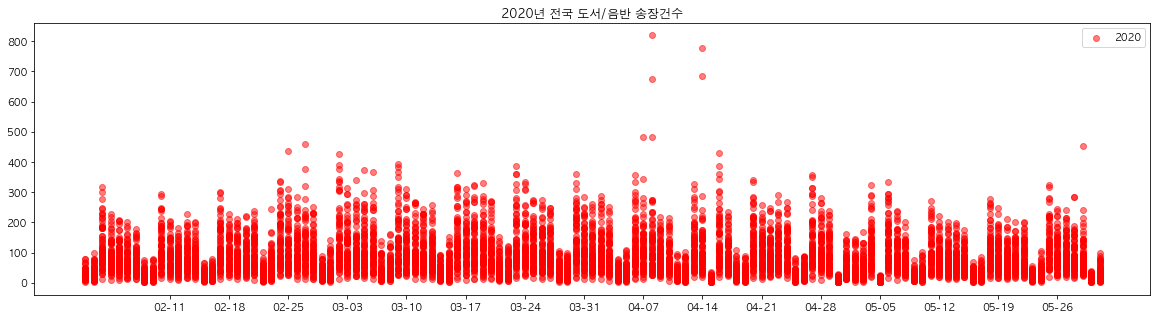

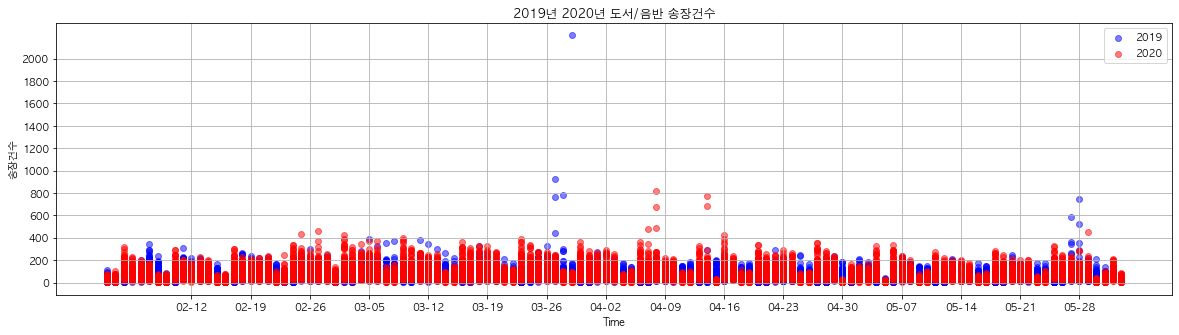

In [44]:
#2019년 도서/음반 송장건수 scatterplot
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(culture_2019['배송날짜'], culture_2019['송장건수'], color='blue', label="2019",alpha=0.5,) 
ax.set_xlabel('Time') 
ax.set_ylabel('송장건수')
ax.set_title('2019년 전국 도서/음반 송장건수')
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
ax.legend()

#2020년 도서/음반 송장건수 scatterplot
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(culture_2020['배송날짜'], culture_2020['송장건수'],
color='red', label='2020',alpha=0.5)
ax.set_title('2020년 전국 도서/음반 송장건수')
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
ax.legend()

#2019년 2020년 한 눈에 보기
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(culture_2019['배송날짜'], culture_2019['송장건수'], color='blue', label="2019",alpha=0.5,) 
ax.set_xlabel('Time') 
ax.set_ylabel('송장건수')
ax.set_title('2019년 2020년 도서/음반 송장건수')
plt.xticks(np.arange(min(x), max(x)+100, 7.0))

ax.scatter(culture_2020['배송날짜'], culture_2020['송장건수'],
color='red', label='2020',alpha=0.5)
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
ax.legend()
plt.yticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000])
plt.grid()
plt.show()

In [45]:
# #2019년 2020년 한 눈에 보기
# fig, ax = plt.subplots(figsize=(20,5)) 
# ax.plot(culture_2019['배송날짜'], culture_2019['송장건수'], color='blue', label="2019",alpha=0.5,) 
# ax.set_xlabel('Time') 
# ax.set_ylabel('송장건수')
# ax.set_title('2019년 2020년 도서/음반 송장건수')
# plt.xticks(np.arange(min(x), max(x)+100, 7.0))

# ax.plot(culture_2020['배송날짜'], culture_2020['송장건수'],
# color='red', label='2020',alpha=0.5)
# plt.xticks(np.arange(min(x), max(x)+100, 7.0))

# ax.legend()

# plt.show()

### 가구/인테리어 송장건수 

In [46]:
### 10 '가구/인테리어' 송장건수 
interior_2019 = shipping_2019[shipping_2019['배송상품대분류코드'] == 10]
interior_2020 = shipping_2020[shipping_2020['배송상품대분류코드'] == 10]

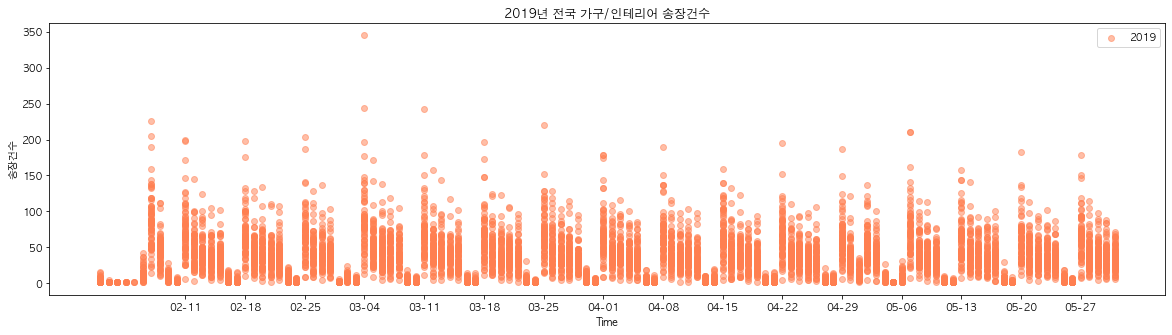

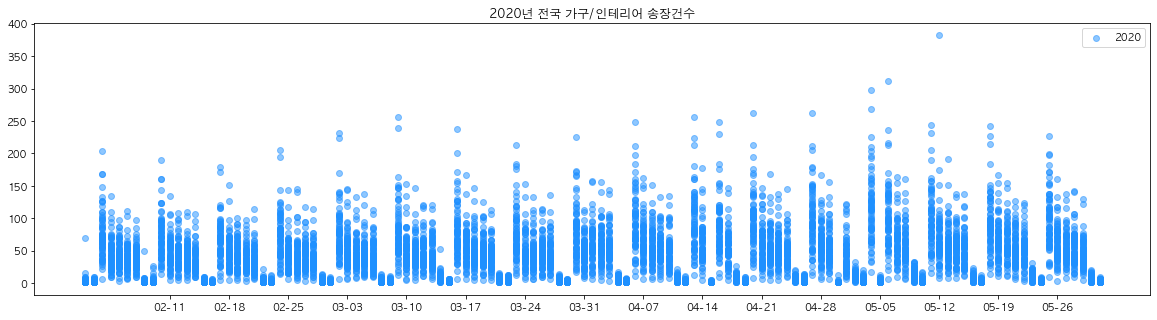

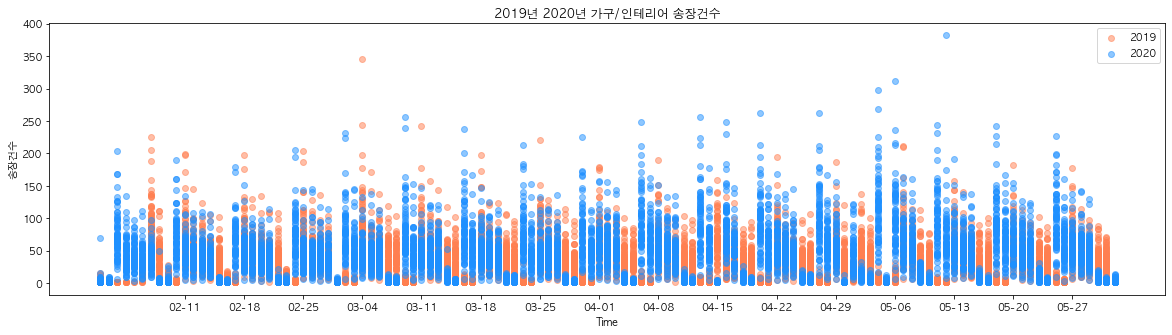

In [47]:
#2019년 송장건수 scatterplot
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(interior_2019['배송날짜'],interior_2019['송장건수'], color='coral', label="2019",alpha=0.5) 
ax.set_xlabel('Time') 
ax.set_ylabel('송장건수')
ax.set_title('2019년 전국 가구/인테리어 송장건수')
ax.legend()
plt.xticks(np.arange(min(x), max(x)+100, 7.0))

#2020년 송장건수 scatterplot
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(interior_2020['배송날짜'], interior_2020['송장건수'],
color='dodgerblue', label='2020',alpha=0.5)
ax.set_title('2020년 전국 가구/인테리어 송장건수')
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
ax.legend()

#2019년 2020년 한 눈에 보기
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(interior_2019['배송날짜'], interior_2019['송장건수'], color='coral', label="2019",alpha=0.5,) 
ax.set_xlabel('Time') 
ax.set_ylabel('송장건수')
ax.set_title('2019년 2020년 가구/인테리어 송장건수')
plt.xticks(np.arange(min(x), max(x)+100, 7.0))


ax.scatter(interior_2020['배송날짜'], interior_2020['송장건수'],
color='dodgerblue', label='2020',alpha=0.5)
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
ax.legend()

plt.show()

In [48]:
# #2019년 2020년 한 눈에 보기
# fig, ax = plt.subplots(figsize=(20,5)) 
# ax.plot(interior_2019['배송날짜'], interior_2019['송장건수'], color='coral', label="2019",alpha=0.5,) 
# ax.set_xlabel('Time') 
# ax.set_ylabel('송장건수')
# ax.set_title('2019년 2020년 가구/인테리어 송장건수')
# plt.xticks(np.arange(min(x), max(x)+100, 7.0))

# ax2 = ax.twinx()
# ax2.plot(interior_2020['배송날짜'], interior_2020['송장건수'],
# color='dodgerblue', label='2020',alpha=0.5)
# plt.xticks(np.arange(min(x), max(x)+100, 7.0))
# ax2.legend()

# plt.show()

## 대구광역시 행정동별 송장건수 2019년 2020년 비교

In [49]:
df_shipping

,배송년월일,배송상품대분류명,배송상품대분류코드,시도명,시도코드,시군구명,시군구코드,행정동명,행정동코드,송장건수,배송날짜,배송연도
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16,2019-02-01,2019
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4,2019-02-01,2019
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1,2019-02-01,2019
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6,2019-02-01,2019
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21,2019-02-01,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
156566,200531,패션의류,19,대구광역시,27,수성구,26,범물2동,662,22,2020-05-31,2020
156567,200531,패션의류,19,서울특별시,11,중구,14,약수동,635,21,2020-05-31,2020
156568,200531,패션잡화,20,대구광역시,27,수성구,26,범물2동,662,14,2020-05-31,2020
156569,200531,패션잡화,20,서울특별시,11,노원구,35,상계6.7동,695,25,2020-05-31,2020


In [50]:
shipping=df_shipping[df_shipping.배송날짜>'2018']
shipping['배송날짜']=shipping['배송날짜'].apply(lambda x: x.strftime('%m-%d'))

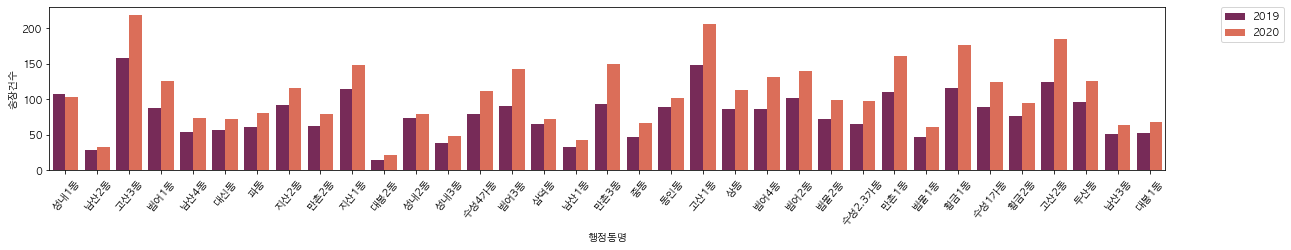

In [51]:
plt.figure(figsize=(20,3))
sns.barplot(data=shipping[shipping['시도명']=='대구광역시'], x="행정동명", y="송장건수", hue="배송연도",ci=None, palette='rocket')
plt.xticks(rotation=50)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.show()

## 대구 행정동별 송장건수 증감률 비교

In [52]:
daegu = shipping[shipping['시도명']=='대구광역시']

In [53]:
d20 = daegu[daegu['배송연도']==2020].groupby(['행정동명'])['송장건수'].sum()
d19 = daegu[daegu['배송연도']==2019].groupby(['행정동명'])['송장건수'].sum()

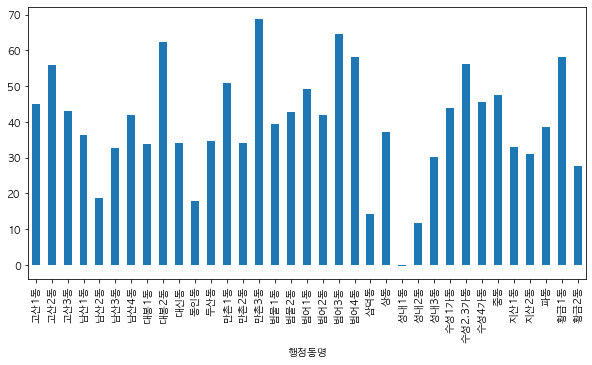

In [54]:
#대구 행정동별 송장건수 증감률
diff_daegu = (d20-d19)/d19*100
plt.figure(figsize=(10,5))
diff_daegu.plot(kind='bar')

In [55]:
#대구 송장건수 증감률 상위 5개 지역
diff_daegu.sort_values(ascending=False).head(5)

행정동명
만촌3동    68.689045
범어3동    64.659335
대봉2동    62.270247
황금1동    58.204100
범어4동    58.148031
Name: 송장건수, dtype: float64

## 서울특별시 행정동별 송장건수 2019년 2020년 비교

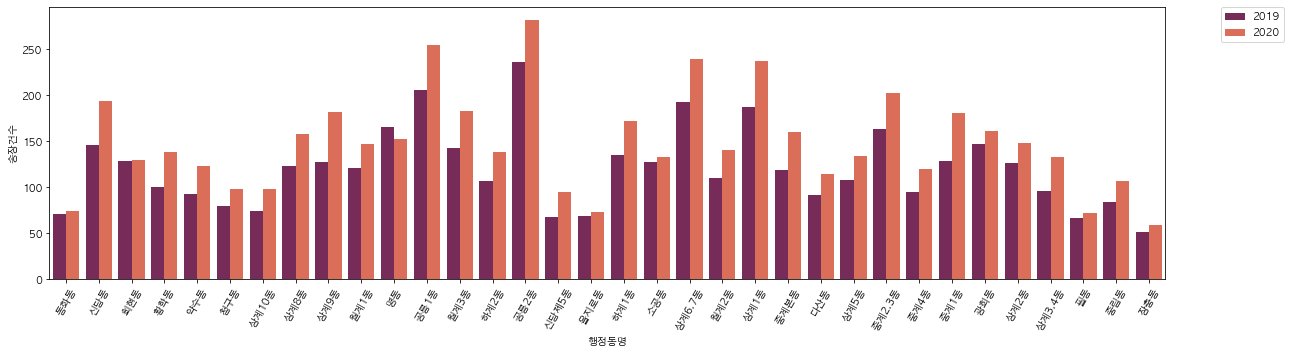

In [56]:
## 대구/서울 행정동별 송장건수 증감률 비
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=shipping[shipping['시도명']=='서울특별시'], x="행정동명", y="송장건수", hue="배송연도",ci=None, palette='rocket')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.show()

In [57]:
seoul = shipping[shipping['시도명']=='서울특별시']

In [58]:
s20 = seoul[seoul['배송연도']==2020].groupby(['행정동명'])['송장건수'].sum()
s19 = seoul[seoul['배송연도']==2019].groupby(['행정동명'])['송장건수'].sum()

## 서울 행정동별 송장건수 증감률 비교

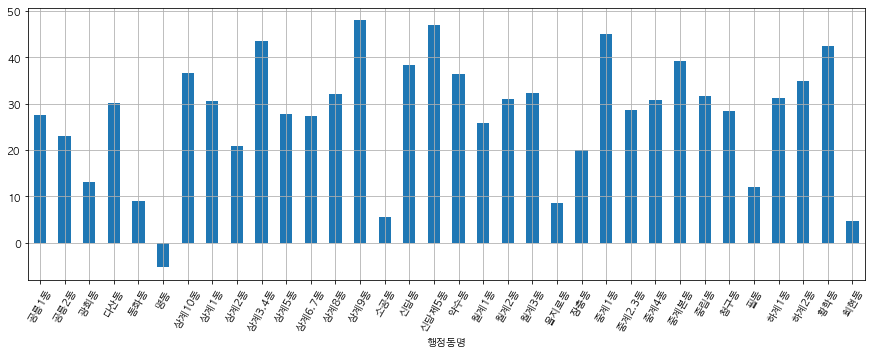

In [59]:
## 대구 행정동별 송장건수 증감률 비교#서울 행정동별 송장건수 증감률
diff_seoul = (s20-s19)/s19*100
plt.figure(figsize=(15,5))
diff_seoul.plot(kind='bar')
plt.xticks(rotation=60)
plt.grid()

## 서울 송장건수 증가율 상위 5개 지역, 배송상품별 변화  

In [60]:
#서울 송장건수 증감률 상위 5개 지역
diff_seoul.sort_values(ascending=False).head(5).index

Index(['상계9동', '신당제5동', '중계1동', '상계3.4동', '황학동'], dtype='object', name='행정동명')

=> 상계9동, 중계1동, 상계3.4동 = 서울시 `노원구` /  신동제5동, 황학동 = 서울 `중구`

In [61]:
seoul_top5 = seoul[seoul['행정동명'].isin(['상계9동', '신당제5동', '중계1동', '상계3.4동', '황학동'])]
seoul_top5.head() 

,배송년월일,배송상품대분류명,배송상품대분류코드,시도명,시도코드,시군구명,시군구코드,행정동명,행정동코드,송장건수,배송날짜,배송연도
7,190201,디지털/가전,13,서울특별시,11,중구,14,황학동,670,14,02-01,2019
18,190201,도서/음반,12,서울특별시,11,노원구,35,상계9동,710,27,02-01,2019
44,190201,디지털/가전,13,서울특별시,11,중구,14,신당제5동,650,10,02-01,2019
60,190201,가구/인테리어,10,서울특별시,11,중구,14,황학동,670,1,02-01,2019
62,190201,가구/인테리어,10,서울특별시,11,노원구,35,상계9동,710,3,02-01,2019


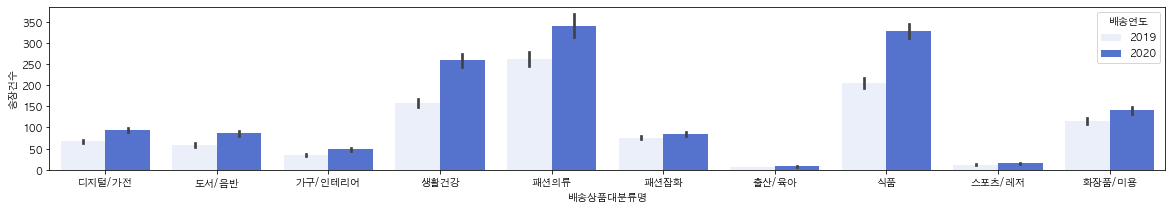

In [62]:
plt.figure(figsize=(20,3))
chart= sns.barplot(data=seoul_top5 , x="배송상품대분류명", y="송장건수", hue="배송연도", color='royalblue')
plt.show()

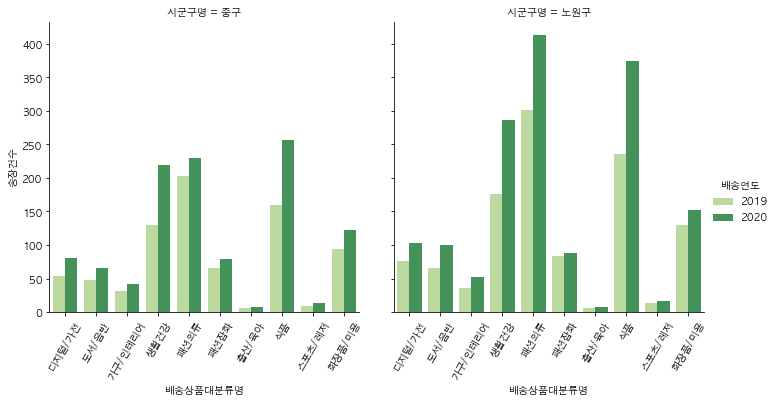

In [63]:
#상위 2개 시군구, 배송상품카테고리 별 전년도 대비 증감 차이
g = sns.catplot(data=seoul_top5, x='배송상품대분류명', y='송장건수',hue='배송연도', col='시군구명', kind='bar',ci=None, palette='YlGn')
g.set_xticklabels(rotation=60)
plt.show()

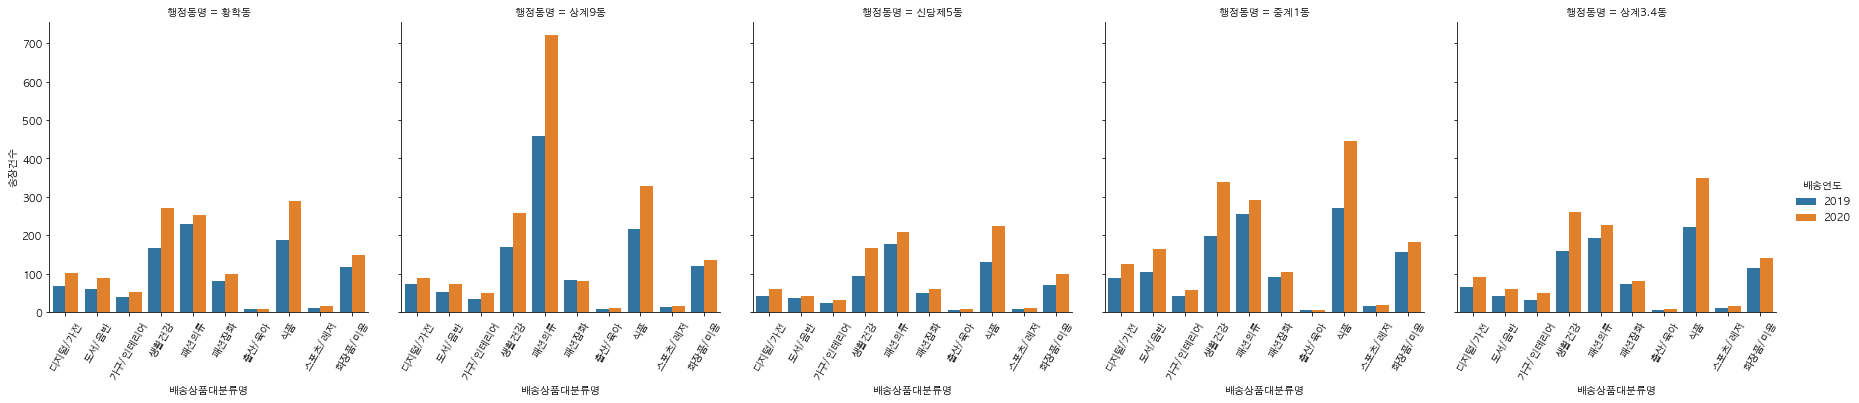

In [64]:
#상위 5개 행정동, 배송상품카테고리 별 전년도 대비 증감 차이
g = sns.catplot(data=seoul_top5, x='배송상품대분류명', y='송장건수',hue='배송연도', col='행정동명', kind='bar',ci=None,)
g.set_xticklabels(rotation=60)
plt.show()

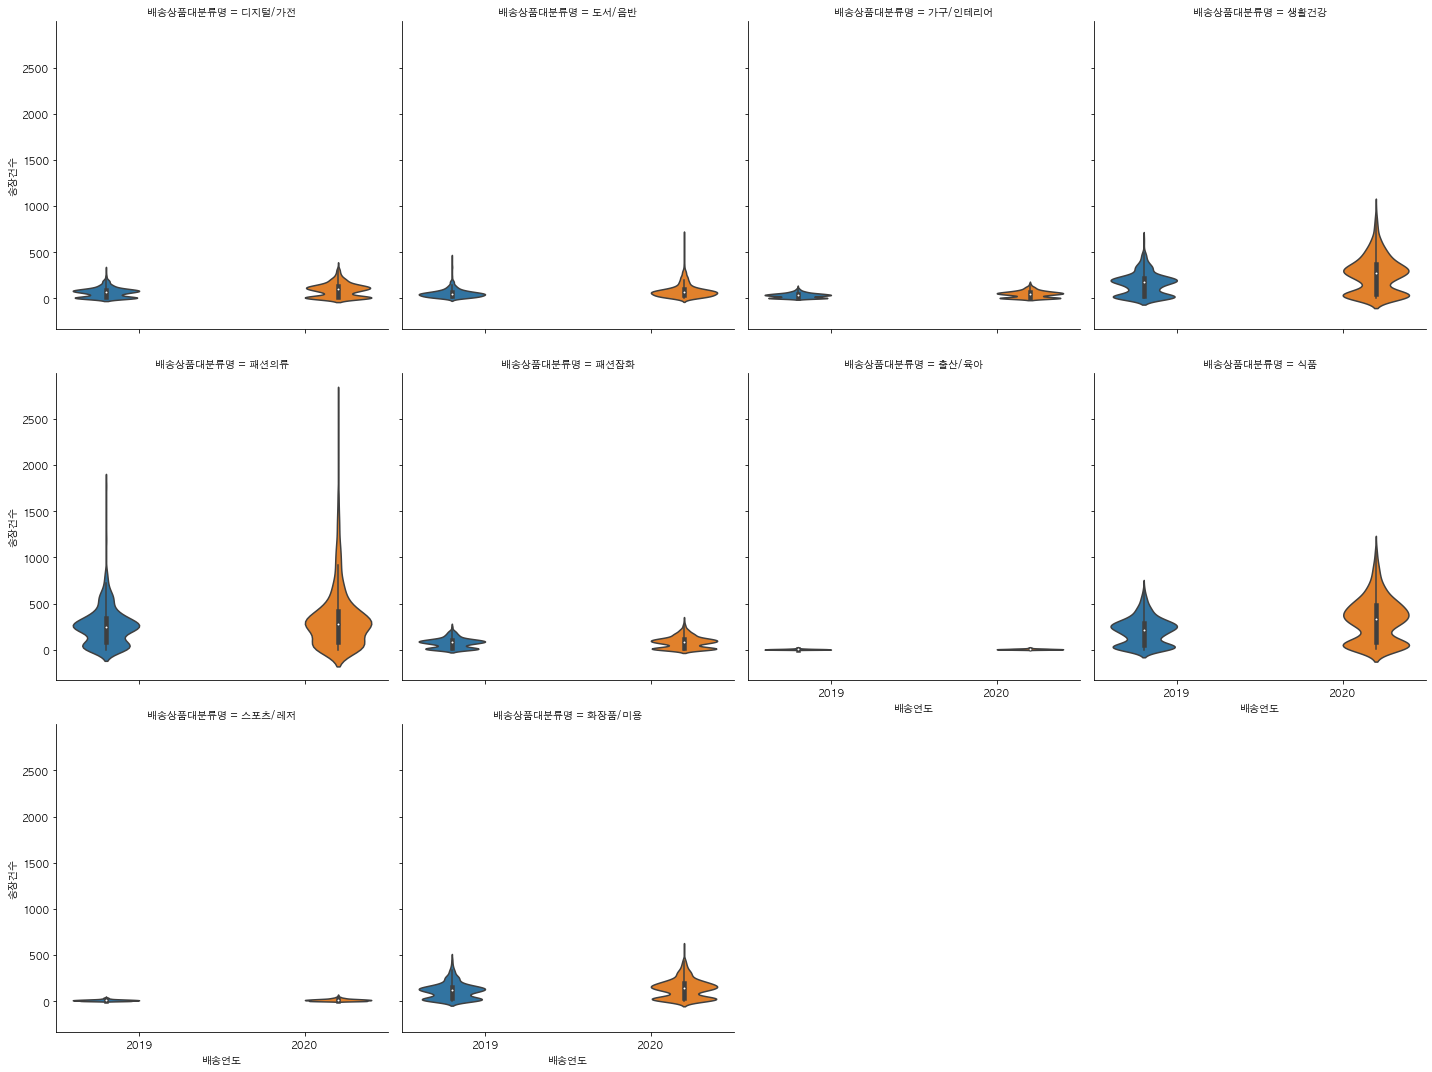

In [65]:
g = sns.catplot(data=seoul_top5, x='배송연도', y='송장건수',hue='배송연도', col='배송상품대분류명', kind='violin', ci=None, col_wrap = 4)
plt.show()

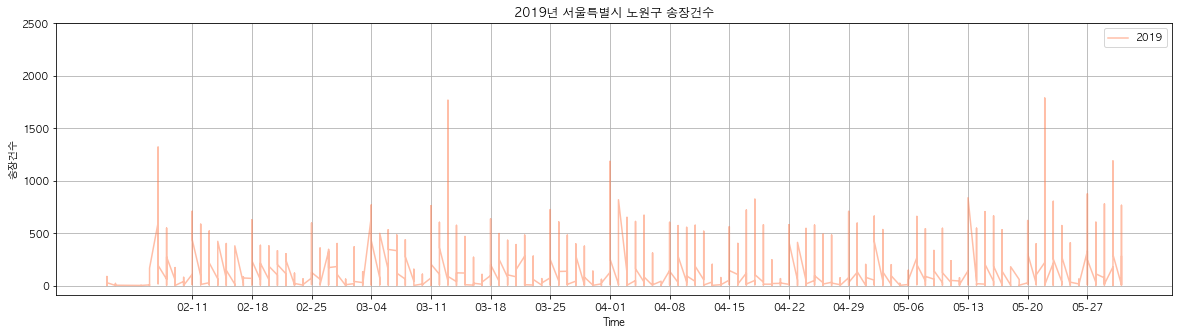

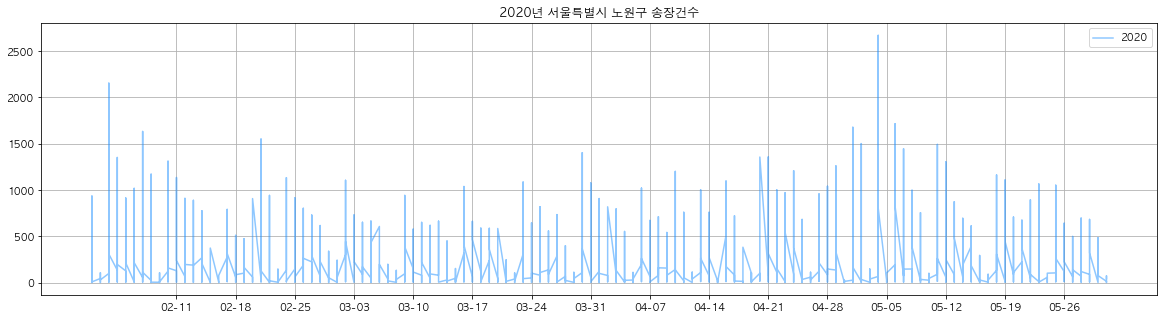

In [66]:
#2019년 2020년 한 눈에 보기
fig, ax = plt.subplots(figsize=(20,5)) 
ax.plot(seoul_top5[(seoul_top5['시군구명']=='노원구') & (seoul_top5['배송연도']==2019)]['배송날짜'], 
        seoul_top5[(seoul_top5['시군구명']=='노원구') & (seoul_top5['배송연도']==2019)]['송장건수'], 
        color='coral', label="2019",alpha=0.5,) 
ax.set_xlabel('Time') 
ax.set_ylabel('송장건수')
ax.set_title('2019년 서울특별시 노원구 송장건수')
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
plt.grid(b=None)
ax.legend()
plt.yticks([0, 500, 1000, 1500, 2000, 2500])



fig, ax = plt.subplots(figsize=(20,5)) 
ax.plot(seoul_top5[(seoul_top5['시군구명']=='노원구') & (seoul_top5['배송연도']==2020)]['배송날짜'], 
        seoul_top5[(seoul_top5['시군구명']=='노원구') & (seoul_top5['배송연도']==2020)]['송장건수'], 
color='dodgerblue', label='2020',alpha=0.5)
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
ax.legend()
ax.set_title('2020년 서울특별시 노원구 송장건수')
plt.grid(b=None)



plt.show()

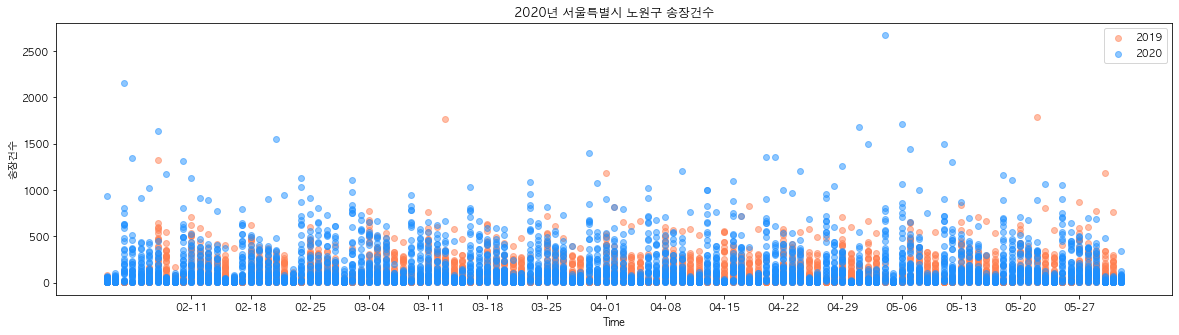

In [67]:
#2019년 2020년 한 눈에 보기
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(seoul_top5[(seoul_top5['시군구명']=='노원구') & (seoul_top5['배송연도']==2019)]['배송날짜'], 
        seoul_top5[(seoul_top5['시군구명']=='노원구') & (seoul_top5['배송연도']==2019)]['송장건수'], 
        color='coral', label="2019",alpha=0.5,) 
ax.set_xlabel('Time') 
ax.set_ylabel('송장건수')
ax.set_title('2019년 서울특별시 노원구 송장건수')
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
plt.grid(b=None)
ax.legend()
plt.yticks([0, 500, 1000, 1500, 2000, 2500])



ax.scatter(seoul_top5[(seoul_top5['시군구명']=='노원구') & (seoul_top5['배송연도']==2020)]['배송날짜'], 
        seoul_top5[(seoul_top5['시군구명']=='노원구') & (seoul_top5['배송연도']==2020)]['송장건수'], 
color='dodgerblue', label='2020',alpha=0.5)
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
ax.legend()
ax.set_title('2020년 서울특별시 노원구 송장건수')
plt.grid(b=None)



plt.show()

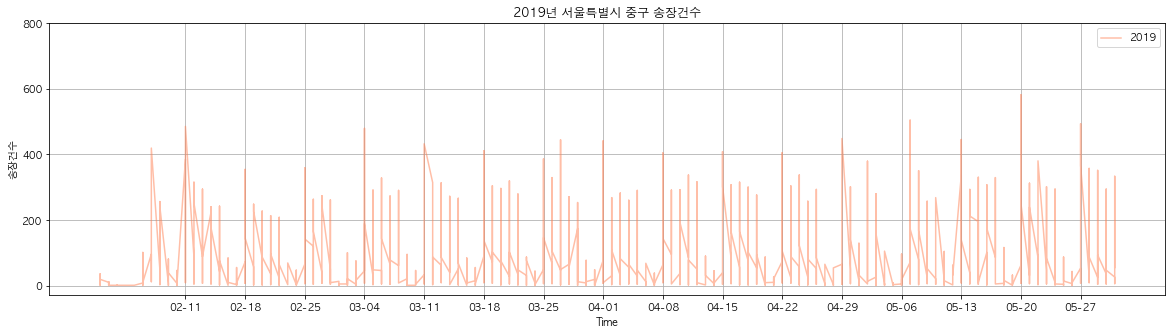

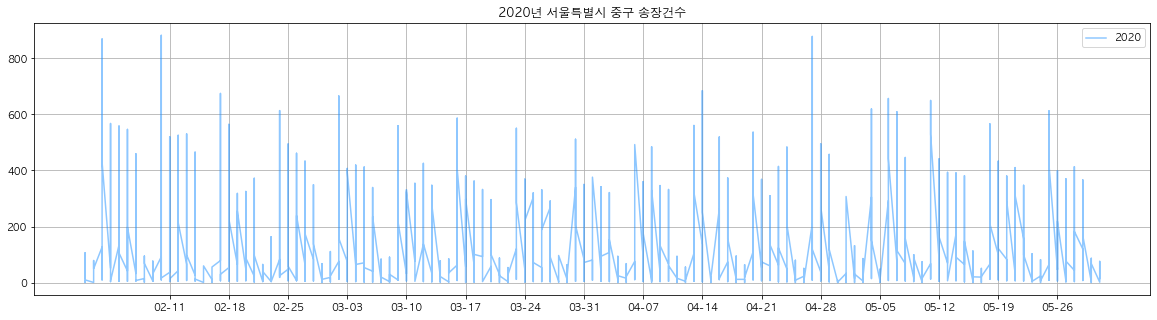

In [68]:
#2019년 2020년 한 눈에 보기
fig, ax = plt.subplots(figsize=(20,5)) 
ax.plot(seoul_top5[(seoul_top5['시군구명']=='중구') & (seoul_top5['배송연도']==2019)]['배송날짜'], 
        seoul_top5[(seoul_top5['시군구명']=='중구') & (seoul_top5['배송연도']==2019)]['송장건수'], 
        color='coral', label="2019",alpha=0.5,) 
ax.set_xlabel('Time') 
ax.set_ylabel('송장건수')
ax.set_title('2019년 서울특별시 중구 송장건수')
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
plt.grid(b=None)
ax.legend()
plt.yticks([0, 200, 400, 600, 800])



fig, ax = plt.subplots(figsize=(20,5)) 
ax.plot(seoul_top5[(seoul_top5['시군구명']=='중구') & (seoul_top5['배송연도']==2020)]['배송날짜'], 
        seoul_top5[(seoul_top5['시군구명']=='중구') & (seoul_top5['배송연도']==2020)]['송장건수'], 
color='dodgerblue', label='2020',alpha=0.5)
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
ax.legend()
ax.set_title('2020년 서울특별시 중구 송장건수')
plt.grid(b=None)
plt.yticks([0, 200, 400, 600, 800])



plt.show()

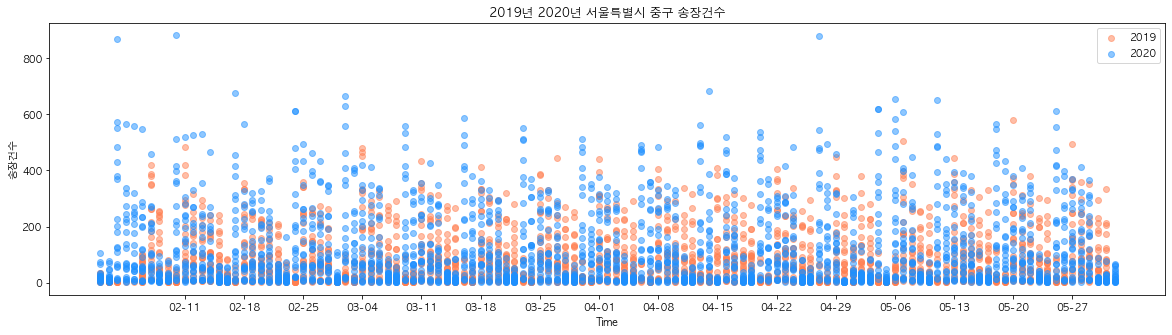

In [69]:
#2019년 2020년 한 눈에 보기
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(seoul_top5[(seoul_top5['시군구명']=='중구') & (seoul_top5['배송연도']==2019)]['배송날짜'], 
        seoul_top5[(seoul_top5['시군구명']=='중구') & (seoul_top5['배송연도']==2019)]['송장건수'], 
        color='coral', label="2019",alpha=0.5,) 
ax.set_xlabel('Time') 
ax.set_ylabel('송장건수')
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
plt.grid(b=None)
ax.legend()
plt.yticks([0, 200, 400, 600, 800])




ax.scatter(seoul_top5[(seoul_top5['시군구명']=='중구') & (seoul_top5['배송연도']==2020)]['배송날짜'], 
        seoul_top5[(seoul_top5['시군구명']=='중구') & (seoul_top5['배송연도']==2020)]['송장건수'], 
color='dodgerblue', label='2020',alpha=0.5)
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
ax.legend()
ax.set_title('2019년 2020년 서울특별시 중구 송장건수')
plt.grid(b=None)
plt.yticks([0, 200, 400, 600, 800])



plt.show()

In [70]:
diff_daegu_top = diff_daegu.sort_values(ascending=False).head(5)
diff_seoul_top = diff_seoul.sort_values(ascending=False).head(5)

## 대구 송장건수 증가율 상위 5개 지역, 배송상품별 변화  

In [71]:
diff_daegu_top.index

Index(['만촌3동', '범어3동', '대봉2동', '황금1동', '범어4동'], dtype='object', name='행정동명')

In [72]:
daegu_top5 = daegu[daegu['행정동명'].isin(['만촌3동', '범어3동', '대봉2동', '황금1동', '범어4동'])]
daegu_top5.head()

,배송년월일,배송상품대분류명,배송상품대분류코드,시도명,시도코드,시군구명,시군구코드,행정동명,행정동코드,송장건수,배송날짜,배송연도
21,190201,도서/음반,12,대구광역시,27,중구,11,대봉2동,690,4,02-01,2019
29,190201,패션잡화,20,대구광역시,27,수성구,26,범어3동,530,11,02-01,2019
34,190201,도서/음반,12,대구광역시,27,수성구,26,만촌3동,561,49,02-01,2019
45,190201,가구/인테리어,10,대구광역시,27,수성구,26,범어3동,530,4,02-01,2019
52,190201,가구/인테리어,10,대구광역시,27,수성구,26,범어4동,540,3,02-01,2019


In [73]:
daegu_top5['시군구명'].unique()

array(['중구', '수성구'], dtype=object)

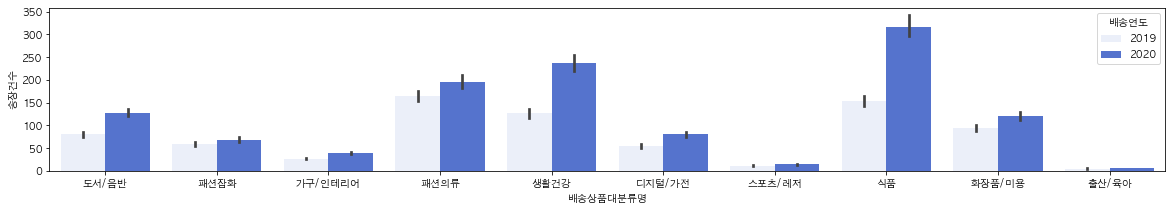

In [74]:
plt.figure(figsize=(20,3))
chart= sns.barplot(data=daegu_top5 , x="배송상품대분류명", y="송장건수", hue="배송연도", color='royalblue')
plt.show()

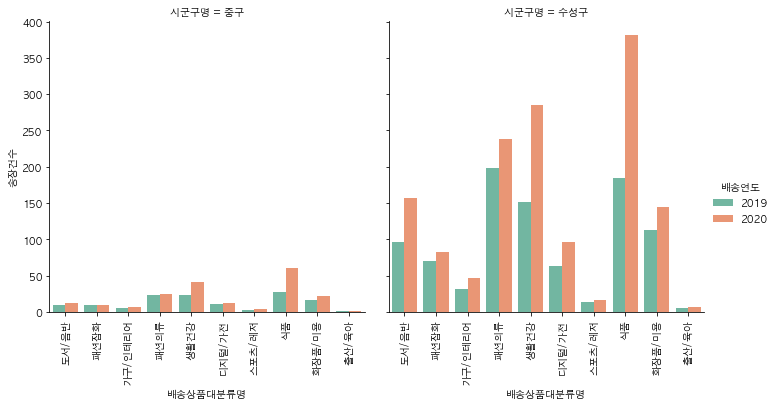

In [75]:
#상위 2개 시군구, 배송상품카테고리 별 전년도 대비 증감 차이
dg = sns.catplot(data=daegu_top5, x='배송상품대분류명', y='송장건수',hue='배송연도', col='시군구명', kind='bar',ci=None, palette='Set2')
dg.set_xticklabels(rotation=90)
plt.show()

* 특히 '식품', '생활건강' 항목의 증가율이 두드러진다.

In [76]:
daegu_top5[(daegu_top5['시군구명']=='중구') & (daegu_top5['배송연도']==2020)]

,배송년월일,배송상품대분류명,배송상품대분류코드,시도명,시도코드,시군구명,시군구코드,행정동명,행정동코드,송장건수,배송날짜,배송연도
76900,200201,디지털/가전,13,대구광역시,27,중구,11,대봉2동,690,2,02-01,2020
77055,200201,생활건강,15,대구광역시,27,중구,11,대봉2동,690,7,02-01,2020
77174,200201,패션잡화,20,대구광역시,27,중구,11,대봉2동,690,1,02-01,2020
77226,200201,도서/음반,12,대구광역시,27,중구,11,대봉2동,690,3,02-01,2020
77345,200201,화장품/미용,21,대구광역시,27,중구,11,대봉2동,690,5,02-01,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
156308,200531,도서/음반,12,대구광역시,27,중구,11,대봉2동,690,1,05-31,2020
156339,200531,화장품/미용,21,대구광역시,27,중구,11,대봉2동,690,3,05-31,2020
156346,200531,식품,17,대구광역시,27,중구,11,대봉2동,690,5,05-31,2020
156391,200531,패션의류,19,대구광역시,27,중구,11,대봉2동,690,1,05-31,2020


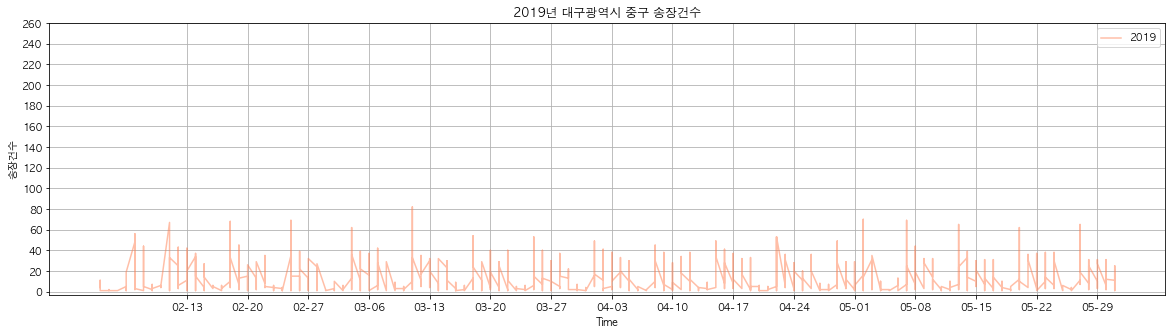

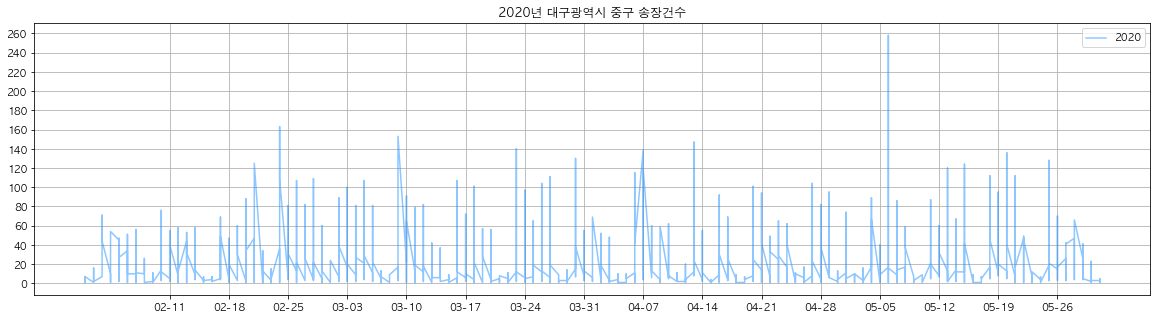

In [77]:
#2019년 2020년 한 눈에 보기
fig, ax = plt.subplots(figsize=(20,5)) 
ax.plot(daegu_top5[(daegu_top5['시군구명']=='중구') & (daegu_top5['배송연도']==2019)]['배송날짜'], 
        daegu_top5[(daegu_top5['시군구명']=='중구') & (daegu_top5['배송연도']==2019)]['송장건수'], 
        color='coral', label="2019",alpha=0.5,) 
ax.set_xlabel('Time') 
ax.set_ylabel('송장건수')
ax.set_title('2019년 대구광역시 중구 송장건수')
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
plt.yticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260])
plt.grid(b=None)
ax.legend()


fig, ax = plt.subplots(figsize=(20,5)) 
ax.plot(daegu_top5[(daegu_top5['시군구명']=='중구') & (daegu_top5['배송연도']==2020)]['배송날짜'], 
        daegu_top5[(daegu_top5['시군구명']=='중구') & (daegu_top5['배송연도']==2020)]['송장건수'], 
color='dodgerblue', label='2020',alpha=0.5)
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
ax.legend()
ax.set_title('2020년 대구광역시 중구 송장건수')
plt.yticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260])
plt.grid(b=None)


plt.show()

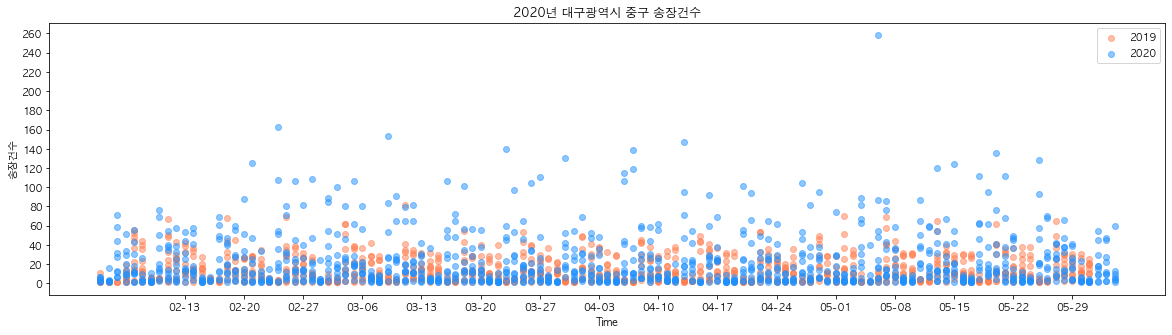

In [78]:
#2019년 2020년 한 눈에 보기
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(daegu_top5[(daegu_top5['시군구명']=='중구') & (daegu_top5['배송연도']==2019)]['배송날짜'], 
        daegu_top5[(daegu_top5['시군구명']=='중구') & (daegu_top5['배송연도']==2019)]['송장건수'], 
        color='coral', label="2019",alpha=0.5,) 
ax.set_xlabel('Time') 
ax.set_ylabel('송장건수')
ax.set_title('2019년 대구광역시 중구 송장건수')
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
plt.yticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260])
plt.grid(b=None)
ax.legend()


ax.scatter(daegu_top5[(daegu_top5['시군구명']=='중구') & (daegu_top5['배송연도']==2020)]['배송날짜'], 
        daegu_top5[(daegu_top5['시군구명']=='중구') & (daegu_top5['배송연도']==2020)]['송장건수'], 
color='dodgerblue', label='2020',alpha=0.5)
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
ax.legend()
ax.set_title('2020년 대구광역시 중구 송장건수')
plt.yticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260])
plt.grid(b=None)


plt.show()

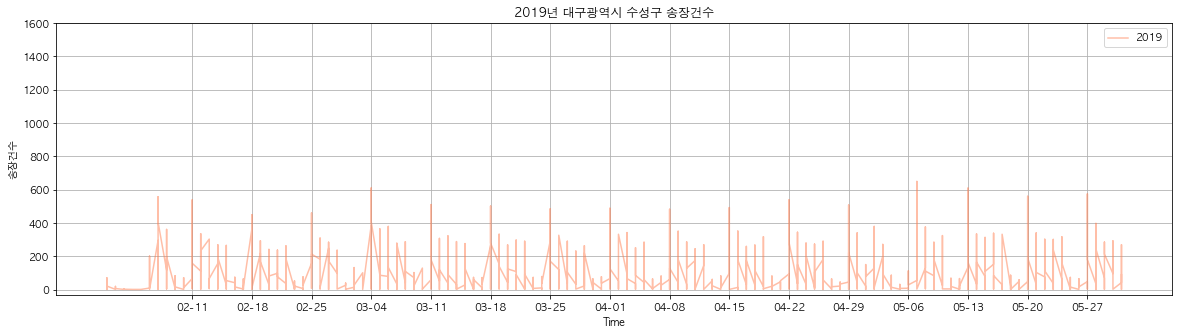

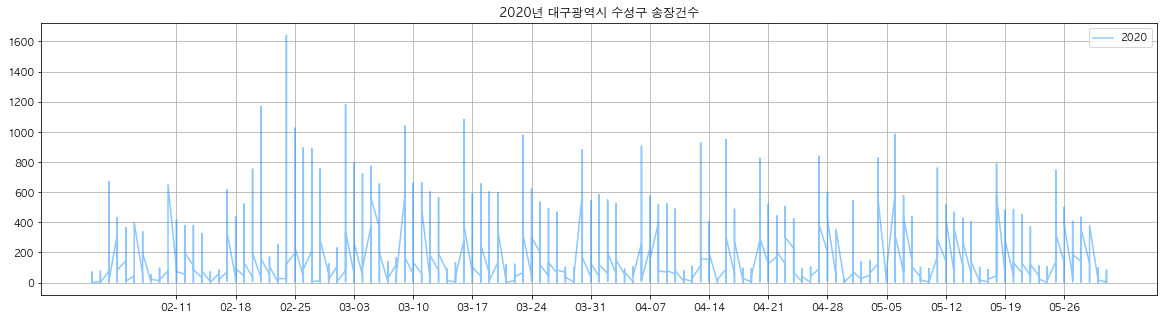

In [79]:
#2019년 2020년 한 눈에 보기
fig, ax = plt.subplots(figsize=(20,5)) 
ax.plot(daegu_top5[(daegu_top5['시군구명']=='수성구') & (daegu_top5['배송연도']==2019)]['배송날짜'], 
        daegu_top5[(daegu_top5['시군구명']=='수성구') & (daegu_top5['배송연도']==2019)]['송장건수'], 
        color='coral', label="2019",alpha=0.5,) 
ax.set_xlabel('Time') 
ax.set_ylabel('송장건수')
ax.set_title('2019년 대구광역시 수성구 송장건수')
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
ax.legend()
plt.grid(b=None)
plt.yticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600])


fig, ax = plt.subplots(figsize=(20,5)) 
ax.plot(daegu_top5[(daegu_top5['시군구명']=='수성구') & (daegu_top5['배송연도']==2020)]['배송날짜'], 
        daegu_top5[(daegu_top5['시군구명']=='수성구') & (daegu_top5['배송연도']==2020)]['송장건수'], 
color='dodgerblue', label='2020',alpha=0.5)
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
ax.legend()
ax.set_title('2020년 대구광역시 수성구 송장건수')
plt.grid(b=None)
plt.yticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600])
plt.show()

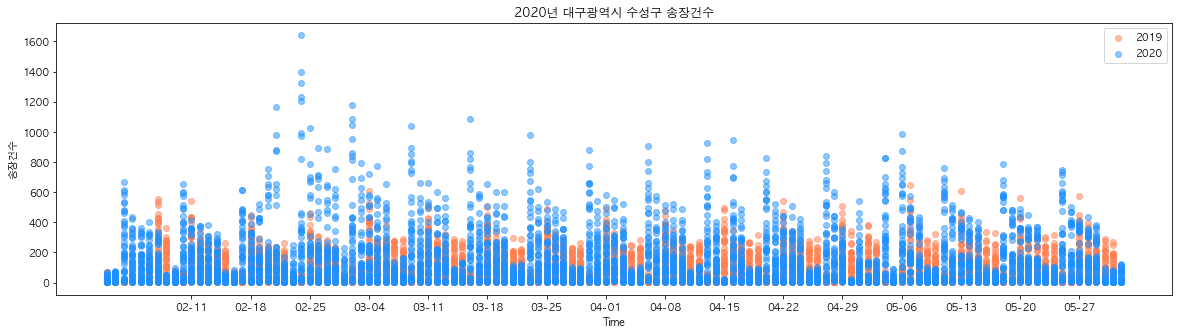

In [80]:
#2019년 2020년 한 눈에 보기
fig, ax = plt.subplots(figsize=(20,5)) 
ax.scatter(daegu_top5[(daegu_top5['시군구명']=='수성구') & (daegu_top5['배송연도']==2019)]['배송날짜'], 
        daegu_top5[(daegu_top5['시군구명']=='수성구') & (daegu_top5['배송연도']==2019)]['송장건수'], 
        color='coral', label="2019",alpha=0.5,) 
ax.set_xlabel('Time') 
ax.set_ylabel('송장건수')
ax.set_title('2019년 대구광역시 수성구 송장건수')
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
ax.legend()
plt.grid(b=None)
plt.yticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600])


ax.scatter(daegu_top5[(daegu_top5['시군구명']=='수성구') & (daegu_top5['배송연도']==2020)]['배송날짜'], 
        daegu_top5[(daegu_top5['시군구명']=='수성구') & (daegu_top5['배송연도']==2020)]['송장건수'], 
color='dodgerblue', label='2020',alpha=0.5)
plt.xticks(np.arange(min(x), max(x)+100, 7.0))
ax.legend()
ax.set_title('2020년 대구광역시 수성구 송장건수')
plt.grid(b=None)
plt.yticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600])
plt.show()

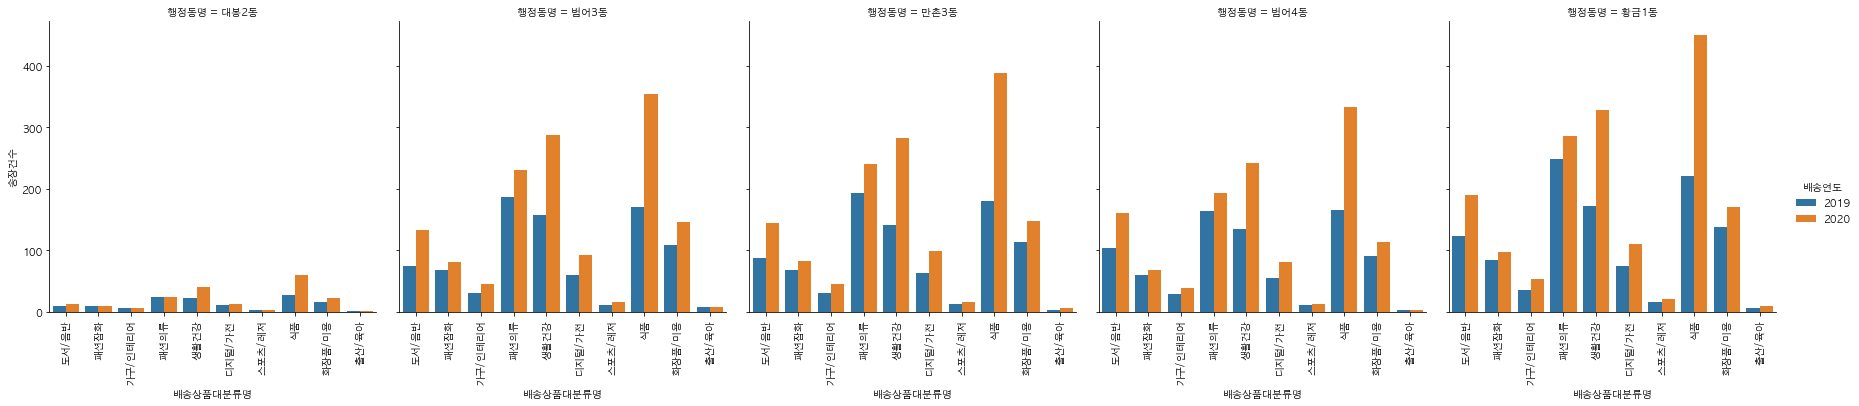

In [81]:
#상위 5개 행정동, 배송상품카테고리 별 전년도 대비 증감 차이
h = sns.catplot(data=daegu_top5, x='배송상품대분류명', y='송장건수',hue='배송연도', col='행정동명', kind='bar',ci=None,)
h.set_xticklabels(rotation=90)
plt.show()

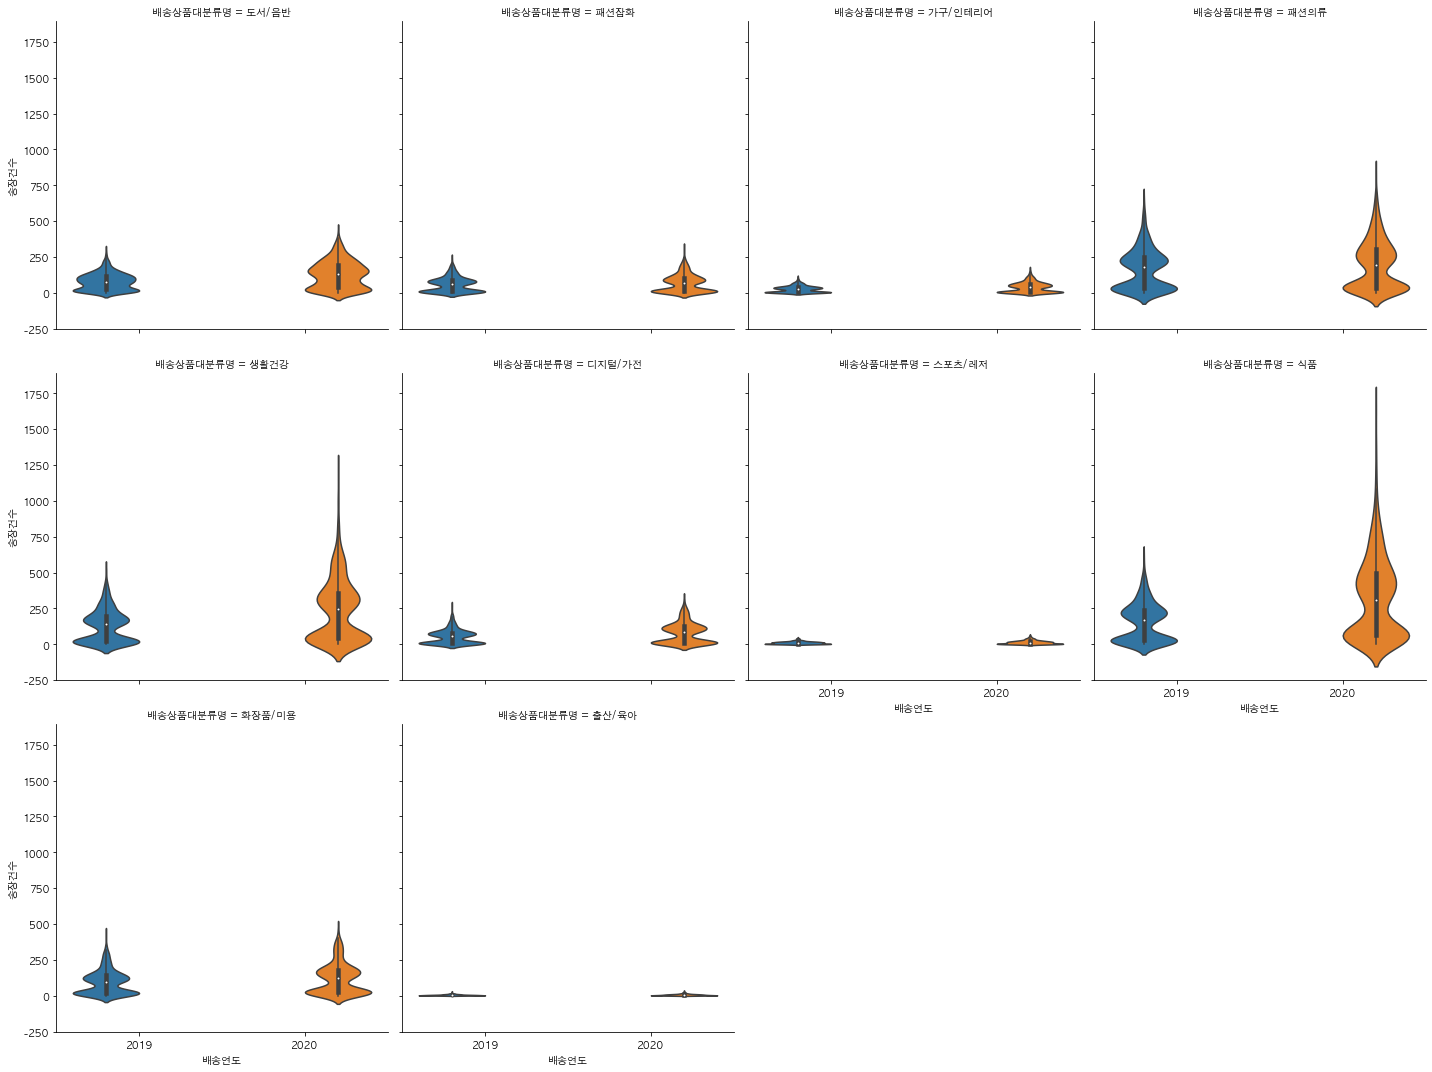

In [82]:
h = sns.catplot(data=daegu_top5, x='배송연도', y='송장건수',hue='배송연도', col='배송상품대분류명', kind='violin', ci=None, col_wrap = 4)
plt.show()

## 1) 서울, 대구 변동폭 큰 상위 4개 상품군 - 시계열상의 비중 변화

In [83]:
## 1. 서울 2019-2020년 변동폭 큰 상위 4개 상품군

## 2) 서울, 대구 차지하는 비율이 큰 상위 4개 상품군 - 시계열상의 비중 변화

In [84]:
shipping['배송상품대분류명'].value_counts(ascending=False)

식품         16478
생활건강       16474
화장품/미용     16425
패션의류       16399
도서/음반      16364
디지털/가전     16259
패션잡화       16220
가구/인테리어    15666
스포츠/레저     13966
출산/육아      12320
Name: 배송상품대분류명, dtype: int64

In [85]:
conda install -c conda-forge missingno

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [86]:
test = daegu_top5.pivot_table(index='배송상품대분류명', columns='시군구명', values='송장건수').round()
test

시군구명,수성구,중구
배송상품대분류명,,
가구/인테리어,39.0,6.0
도서/음반,127.0,11.0
디지털/가전,80.0,12.0
생활건강,219.0,32.0
스포츠/레저,15.0,3.0
식품,284.0,44.0
출산/육아,6.0,1.0
패션의류,218.0,24.0
패션잡화,76.0,9.0


In [295]:
import missingno as msno